In [1]:
import nstrace
import matplotlib.pyplot as plt 
from os import listdir
import os.path
from os.path import isfile, join
from pathlib import Path
import shutil 

In [2]:
shutil.rmtree("Newreno",ignore_errors = True)
shutil.rmtree("Tahoe",ignore_errors = True)
shutil.rmtree("Vegas",ignore_errors = True)
tcp_agents = ["Newreno","Tahoe","Vegas"]
for tcp in tcp_agents:
    os.makedirs(tcp + "/cwnd/flow0")
    os.makedirs(tcp + "/cwnd/flow1")
    os.makedirs(tcp + "/goodput/flow0")
    os.makedirs(tcp + "/goodput/flow1")
    os.makedirs(tcp + "/droprate/flow0")
    os.makedirs(tcp + "/droprate/flow1")
    os.makedirs(tcp + "/droprate/tracefiles")
    os.makedirs(tcp + "/rtt/flow0")
    os.makedirs(tcp + "/rtt/flow1")
    for i in range(10):
        print("run " + "ns main.tcl " + tcp + " " + str(i+1))
        os.system("ns main.tcl " + tcp + " " + str(i+1))

run ns main.tcl Newreno 1
run ns main.tcl Newreno 2
run ns main.tcl Newreno 3
run ns main.tcl Newreno 4
run ns main.tcl Newreno 5
run ns main.tcl Newreno 6
run ns main.tcl Newreno 7
run ns main.tcl Newreno 8
run ns main.tcl Newreno 9
run ns main.tcl Newreno 10
run ns main.tcl Tahoe 1
run ns main.tcl Tahoe 2
run ns main.tcl Tahoe 3
run ns main.tcl Tahoe 4
run ns main.tcl Tahoe 5
run ns main.tcl Tahoe 6
run ns main.tcl Tahoe 7
run ns main.tcl Tahoe 8
run ns main.tcl Tahoe 9
run ns main.tcl Tahoe 10
run ns main.tcl Vegas 1
run ns main.tcl Vegas 2
run ns main.tcl Vegas 3
run ns main.tcl Vegas 4
run ns main.tcl Vegas 5
run ns main.tcl Vegas 6
run ns main.tcl Vegas 7
run ns main.tcl Vegas 8
run ns main.tcl Vegas 9
run ns main.tcl Vegas 10


In [3]:
def chart_cwnd(mypath, plotname):
    onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
    num_files = len(onlyfiles)
    data = {}
    for file in onlyfiles:
        f = open(mypath + "/" + file, "r")
        f.readline()
        for line in f.readlines():
            info = line.strip().split(" ")
            time, value = int(info[0]), float(info[1])
            if time not in data:
                data[time] = value
            else:
                data[time] += value

    f = open(mypath + "/mean.txt", "w")
    values = []
    times = []

    for time in data:
        data[time] = data[time] / num_files
        values.append(data[time])
        times.append(time)
        f.write(str(time) + " " + str(data[time]) + "\n")
    f.close()
        
    plt.rcParams.update({'font.size': 22})
    plt.figure(figsize=(30,10))    
    plt.plot(times, values)
    plt.xlabel('time')
    plt.ylabel('cwnd') 
    plt.ylim(ymin=0)  # this line
    plt.title('cwnd change')
    plt.savefig("plot/" + plotname + ".png")
    plt.show()

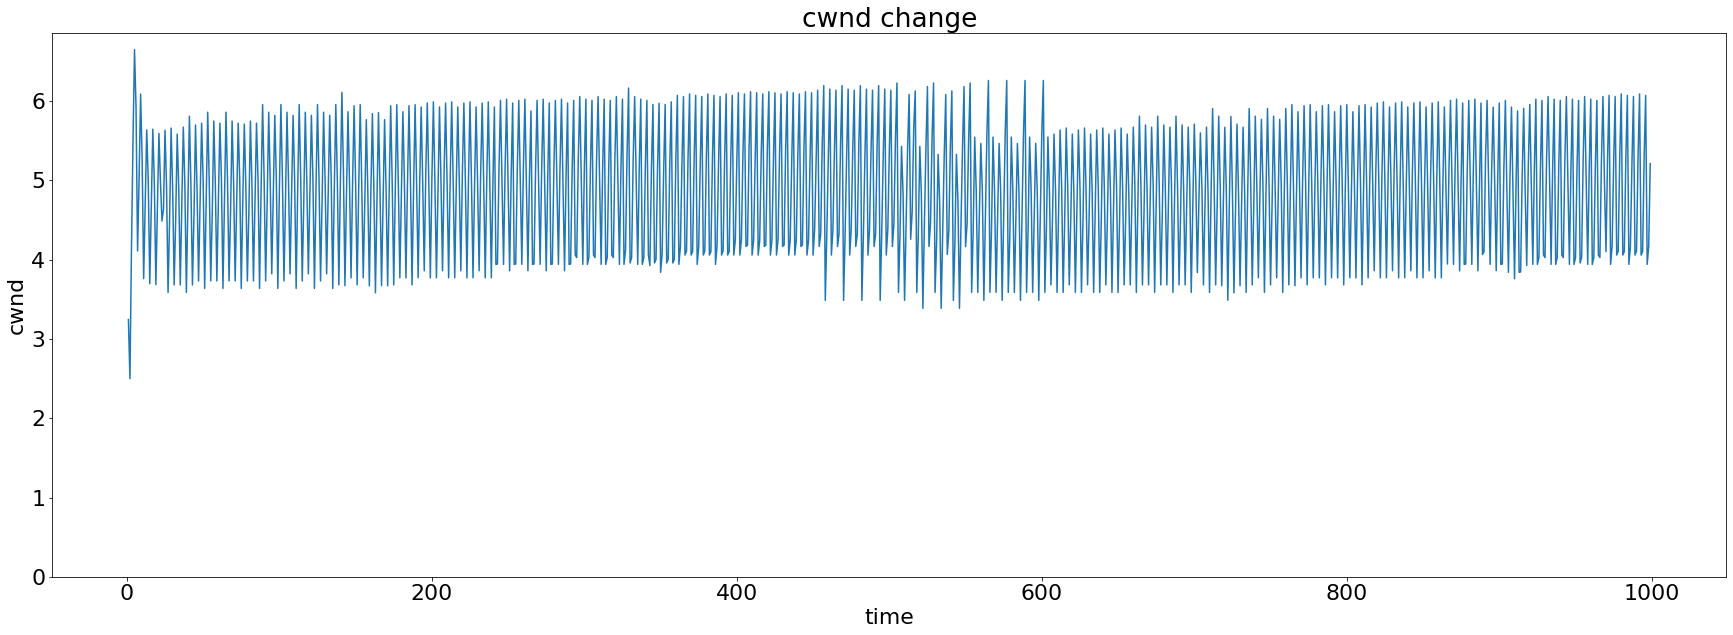

In [4]:
chart_cwnd("Newreno/cwnd/flow0", "Newreno_cwnd_flow0")

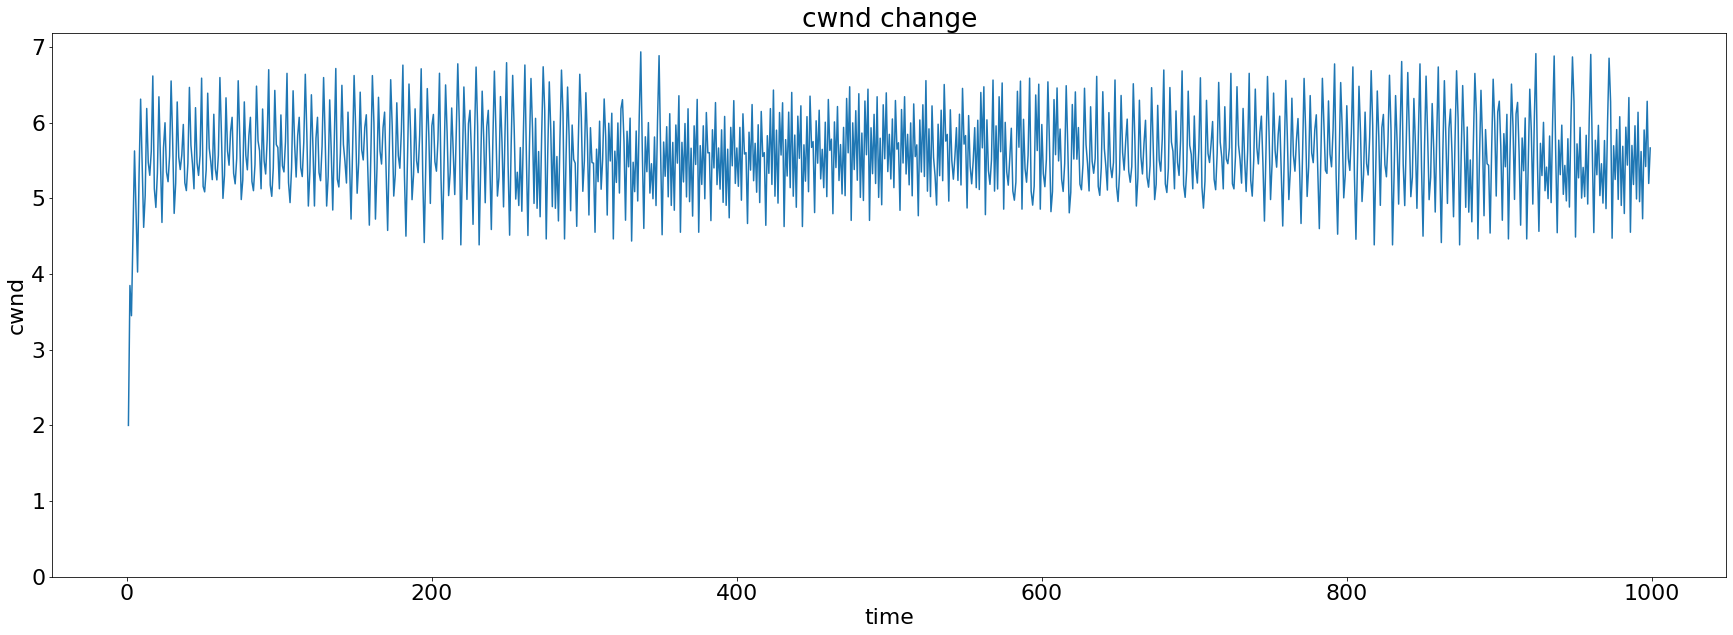

In [5]:
chart_cwnd("Newreno/cwnd/flow1","Newreno_cwnd_flow1")

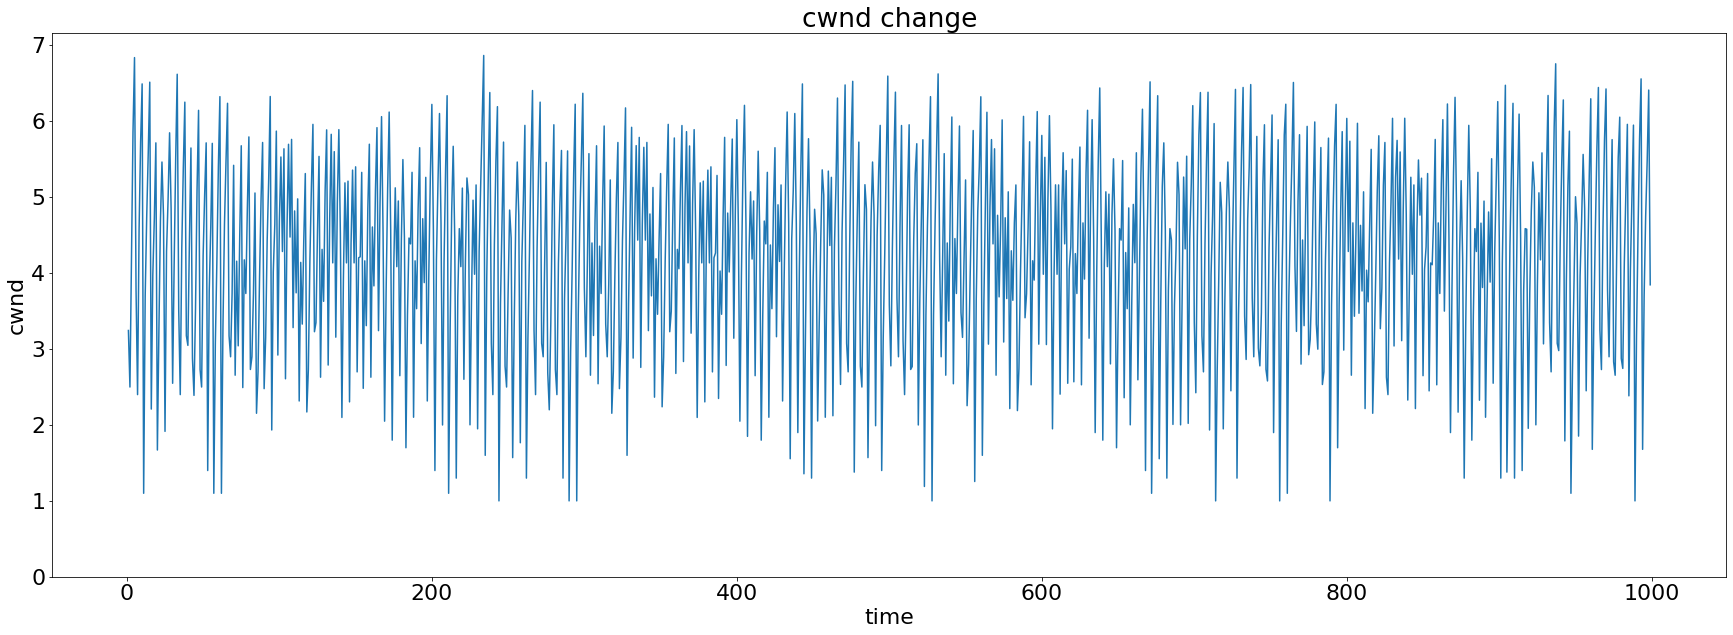

In [6]:
chart_cwnd("Tahoe/cwnd/flow0","Tahoe_cwnd_flow0")

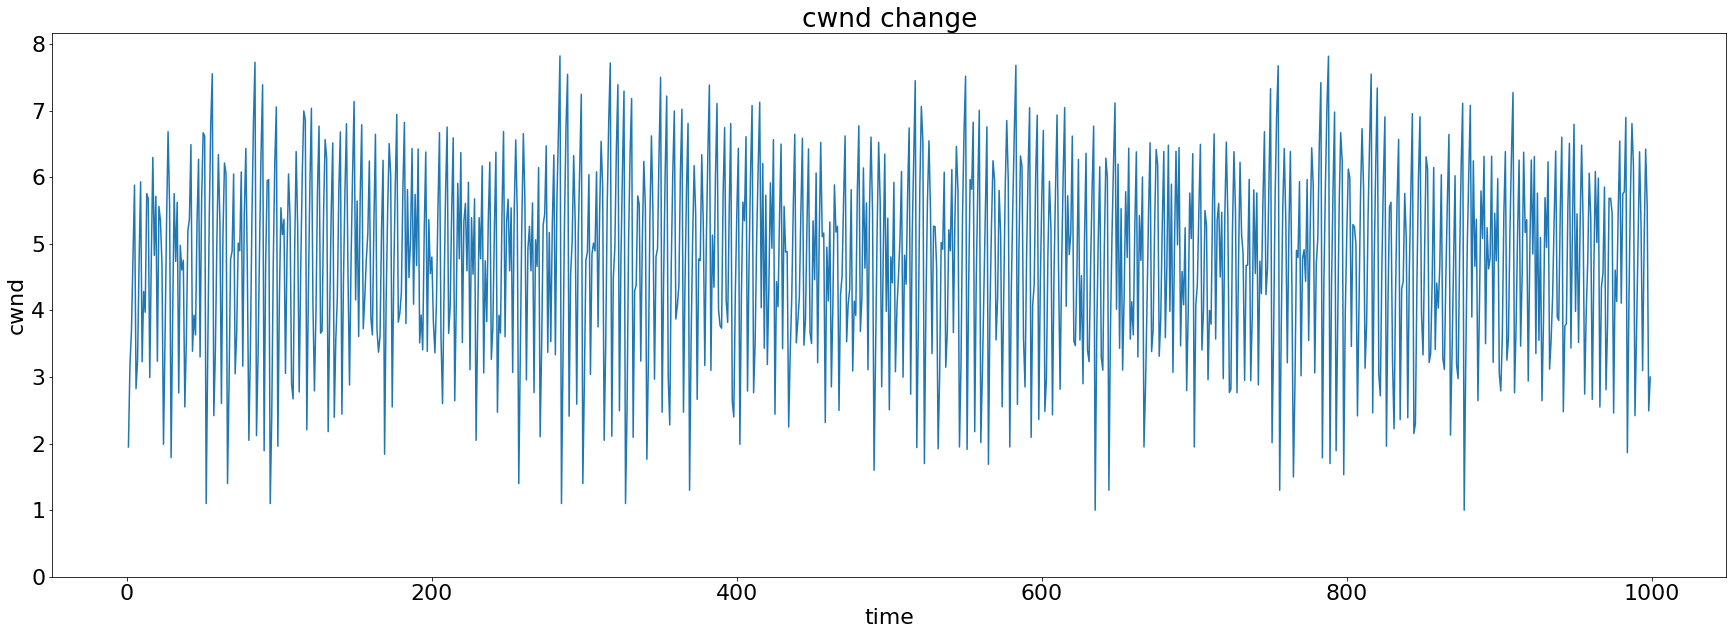

In [7]:
chart_cwnd("Tahoe/cwnd/flow1","Tahoe_cwnd_flow1")

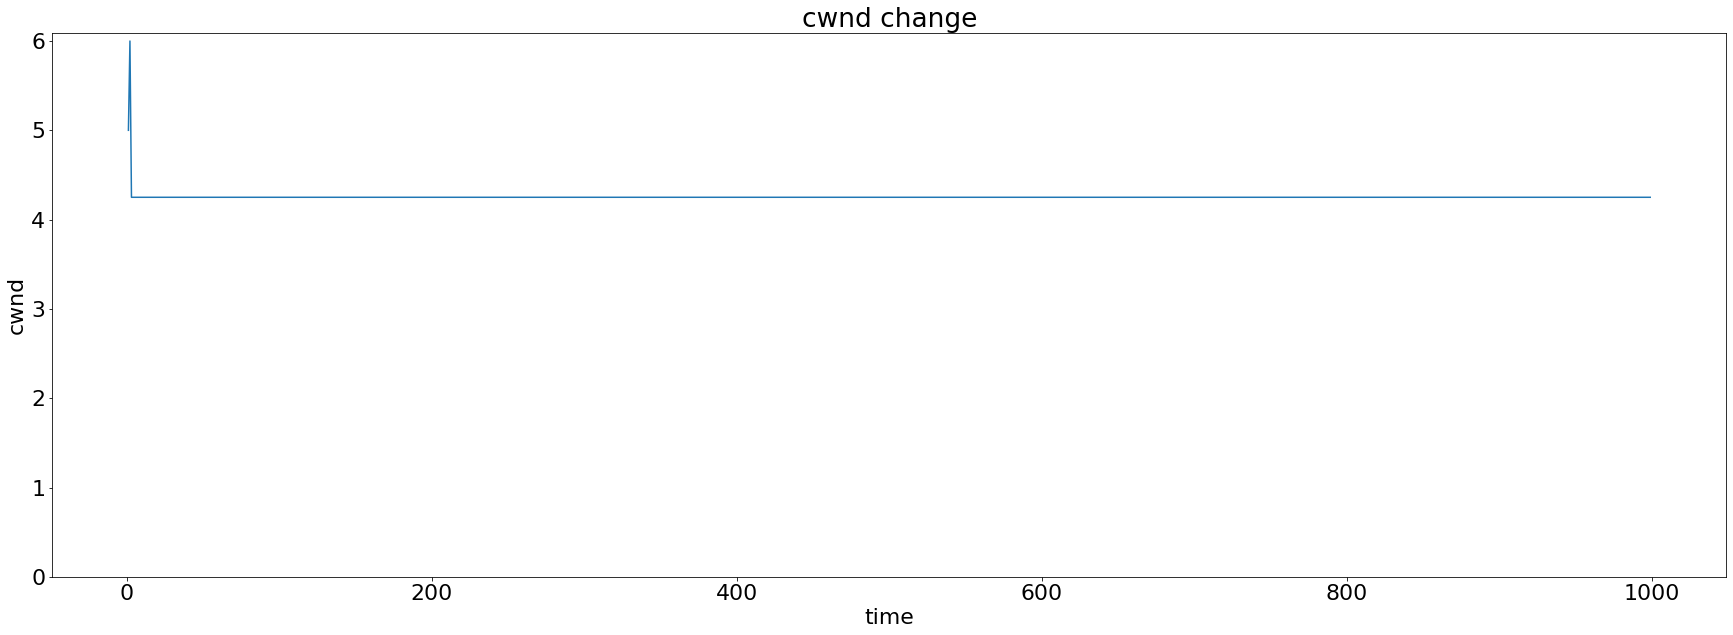

In [8]:
chart_cwnd("Vegas/cwnd/flow0","Vegas_cwnd_flow0")

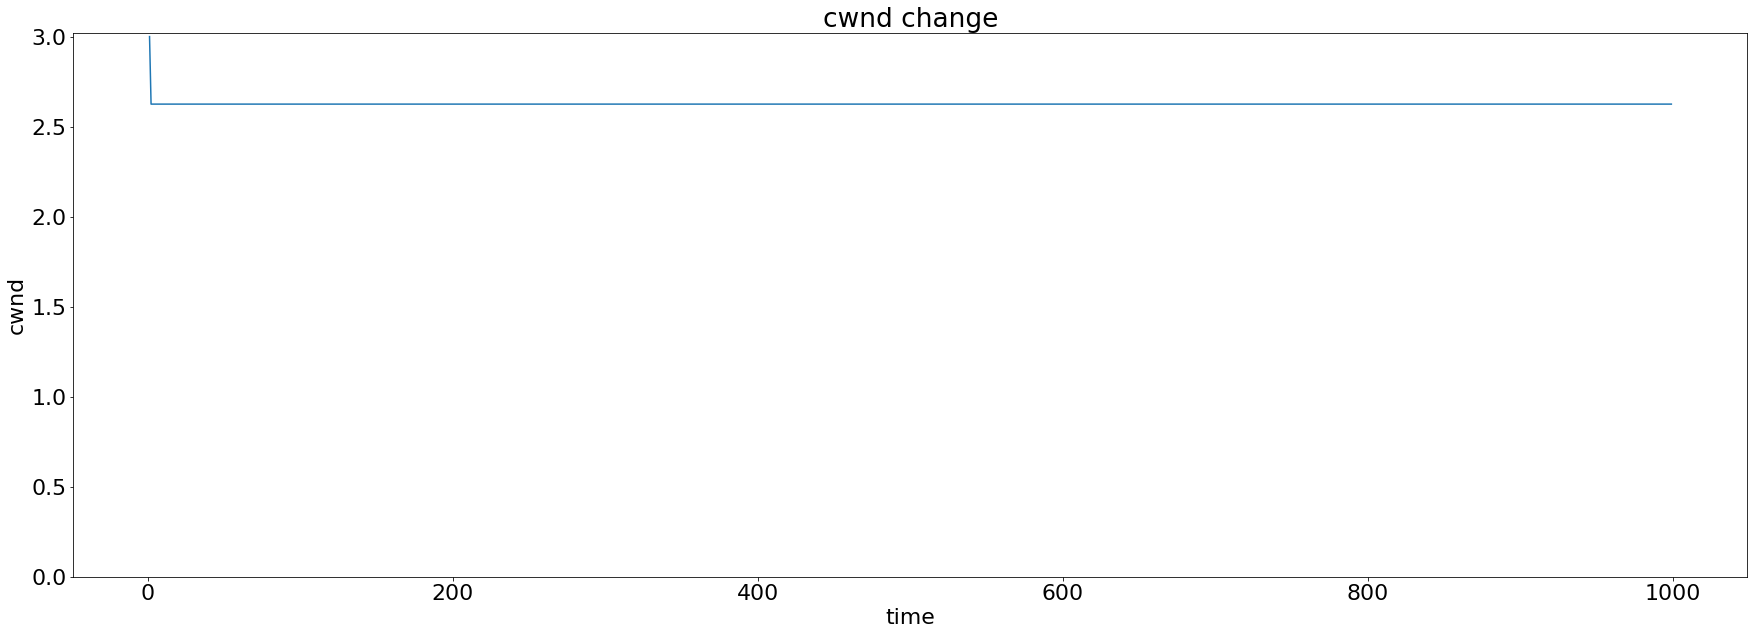

In [9]:
chart_cwnd("Vegas/cwnd/flow1","Vegas_cwnd_flow1")

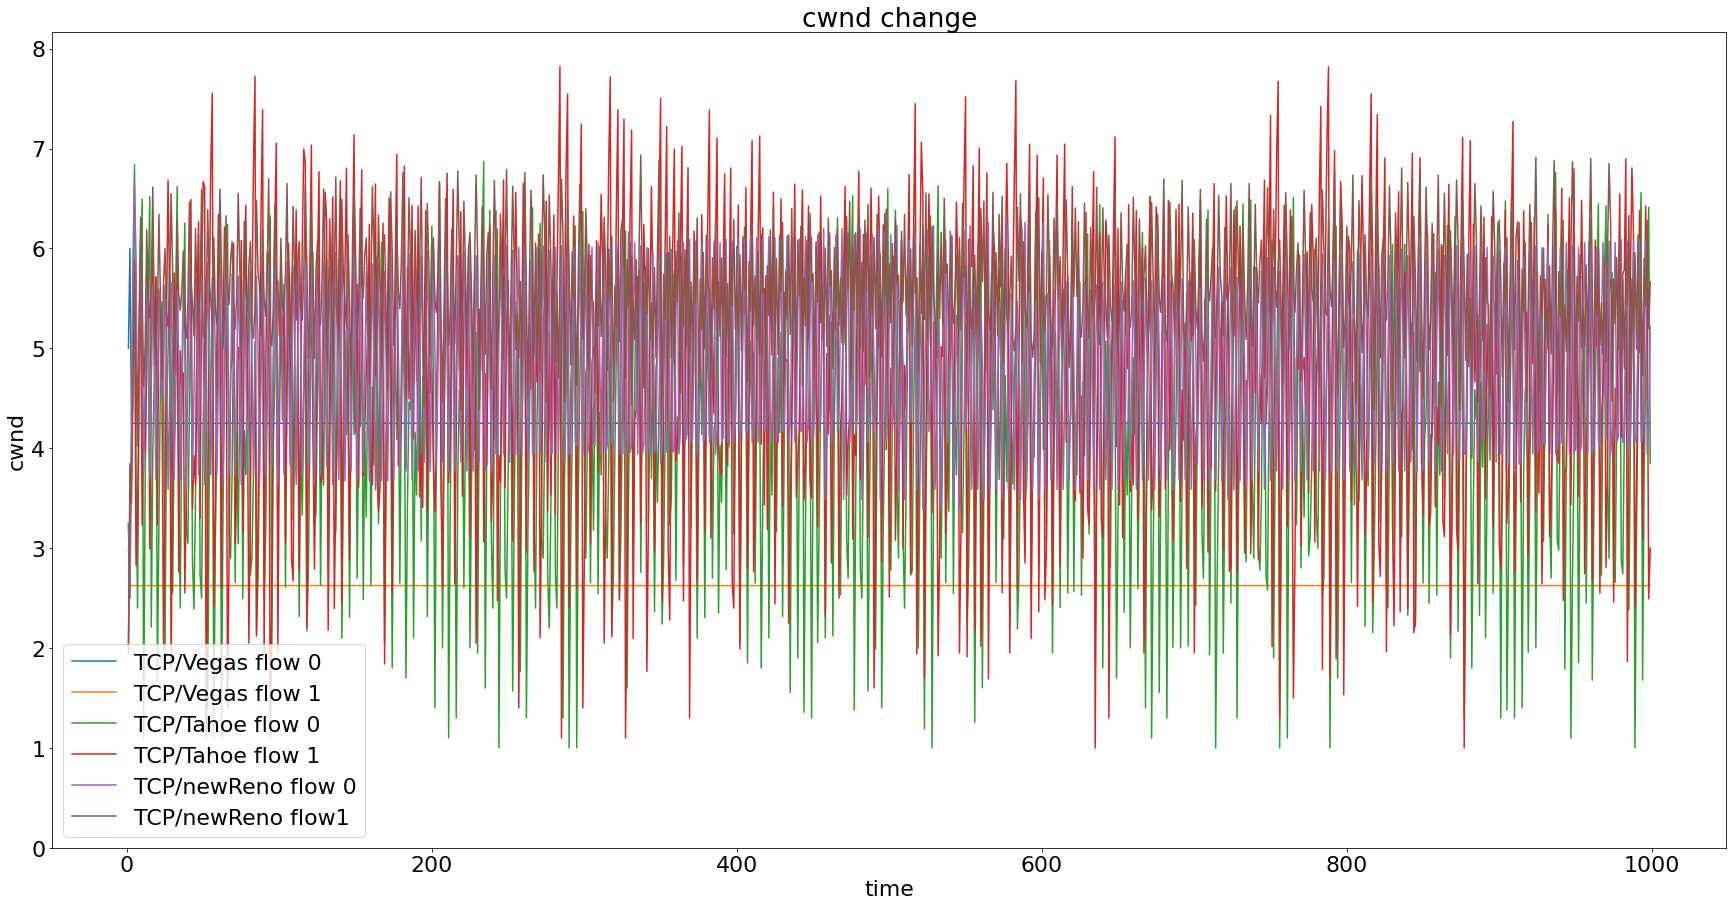

In [10]:
filepath1 = "Vegas/cwnd/flow0/mean.txt"
filepath2 = "Vegas/cwnd/flow1/mean.txt"
filepath3 = "Tahoe/cwnd/flow0/mean.txt"
filepath4 = "Tahoe/cwnd/flow1/mean.txt"
filepath5 = "Newreno/cwnd/flow0/mean.txt"
filepath6 = "Newreno/cwnd/flow1/mean.txt"
times1 = []
values1 = []
times2 = []
values2 = []
times3 = []
values3 = []
times4 = []
values4 = []
times5 = []
values5 = []
times6 = []
values6 = []

f = open(filepath1, "r")
for line in f.readlines():
    info = line.strip().split(" ")
    time, value = int(info[0]), float(info[1])
    times1.append(time)
    values1.append(value)

f = open(filepath2, "r")
for line in f.readlines():
    info = line.strip().split(" ")
    time, value = int(info[0]), float(info[1])
    times2.append(time)
    values2.append(value)

    
f = open(filepath3, "r")
for line in f.readlines():
    info = line.strip().split(" ")
    time, value = int(info[0]), float(info[1])
    times3.append(time)
    values3.append(value)


f = open(filepath4, "r")
for line in f.readlines():
    info = line.strip().split(" ")
    time, value = int(info[0]), float(info[1])
    times4.append(time)
    values4.append(value)


f = open(filepath5, "r")
for line in f.readlines():
    info = line.strip().split(" ")
    time, value = int(info[0]), float(info[1])
    times5.append(time)
    values5.append(value)


f = open(filepath6, "r")
for line in f.readlines():
    info = line.strip().split(" ")
    time, value = int(info[0]), float(info[1])
    times6.append(time)
    values6.append(value)

plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(30,15))  
plt.title('cwnd change') 
plt.xlabel('time')
plt.ylabel('cwnd') 
plt.plot(times1, values1, label='TCP/Vegas flow 0')
plt.plot(times2, values2, label='TCP/Vegas flow 1')
plt.plot(times3, values3 , label='TCP/Tahoe flow 0')  
plt.plot(times4, values4 , label='TCP/Tahoe flow 1')   
plt.plot(times5, values5 , label='TCP/newReno flow 0')  
plt.plot(times5, values6 , label='TCP/newReno flow1')
plt.legend()
plt.ylim(ymin=0)  # this line
plt.savefig('plot/cwnd.png')
plt.show()

In [11]:
def chart_goodput(mypath, plotname):
    onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
    num_files = len(onlyfiles)
    data = {}
    for file in onlyfiles:
        f = open(mypath + "/" + file, "r")
        f.readline()
        for line in f.readlines():
            info = line.strip().split(" ")
            time, value = int(info[0]), float(info[1])
            if time not in data:
                data[time] = value
            else:
                data[time] += value

    f = open(mypath + "/mean.txt", "w")
    values = []
    times = []

    for time in data:
        data[time] = data[time] / num_files
        values.append(data[time])
        times.append(time)
        f.write(str(time) + " " + str(data[time]) + "\n")
    f.close()
        
    plt.rcParams.update({'font.size': 22})
    plt.figure(figsize=(30,10))    
    plt.plot(times, values)
    plt.xlabel('time')
    plt.ylabel('goodput') 
    plt.title('goodput change')
    plt.ylim(ymin=0)  # this line
    plt.savefig("plot/" + plotname + ".png")
    plt.show()

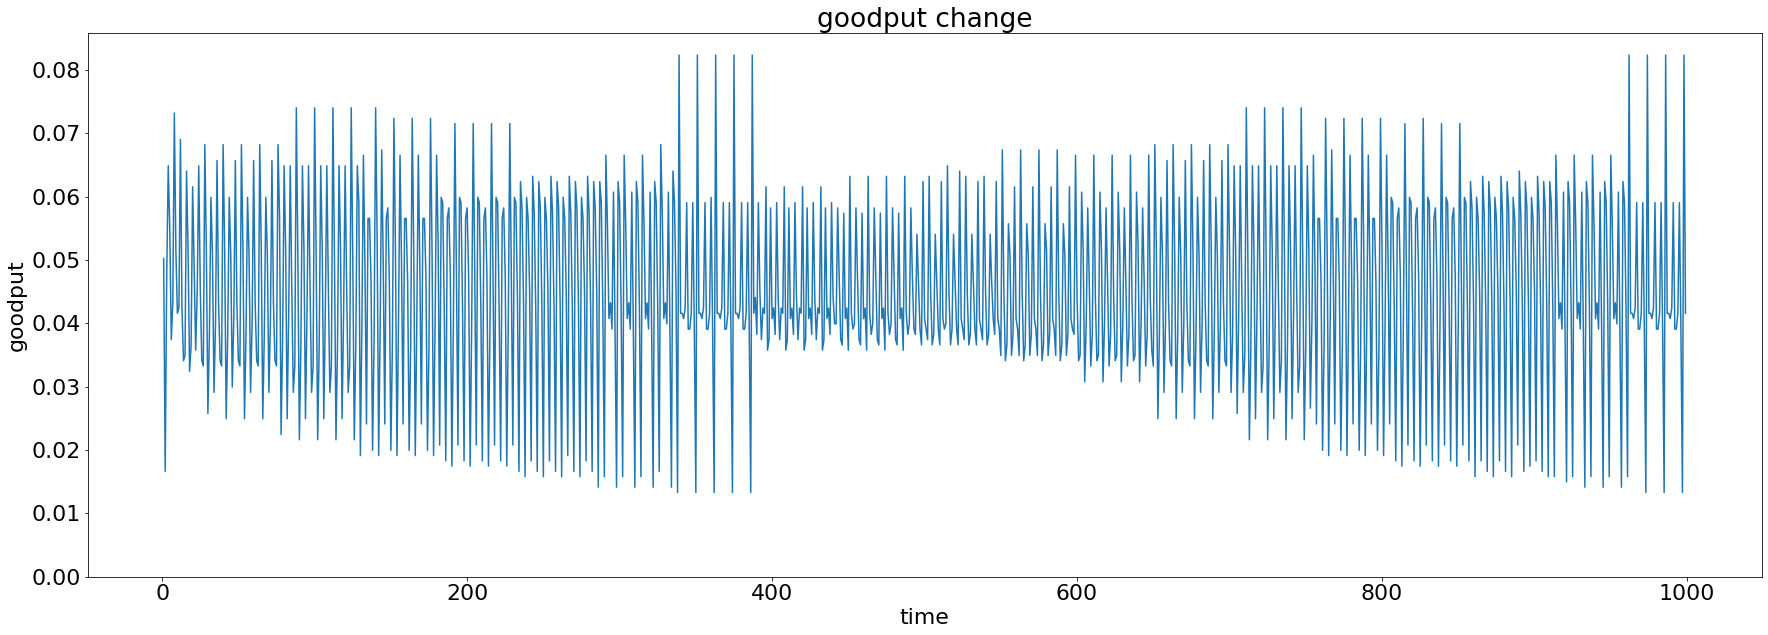

In [12]:
chart_goodput("Newreno/goodput/flow0", "Newreno_goodput_flow0")

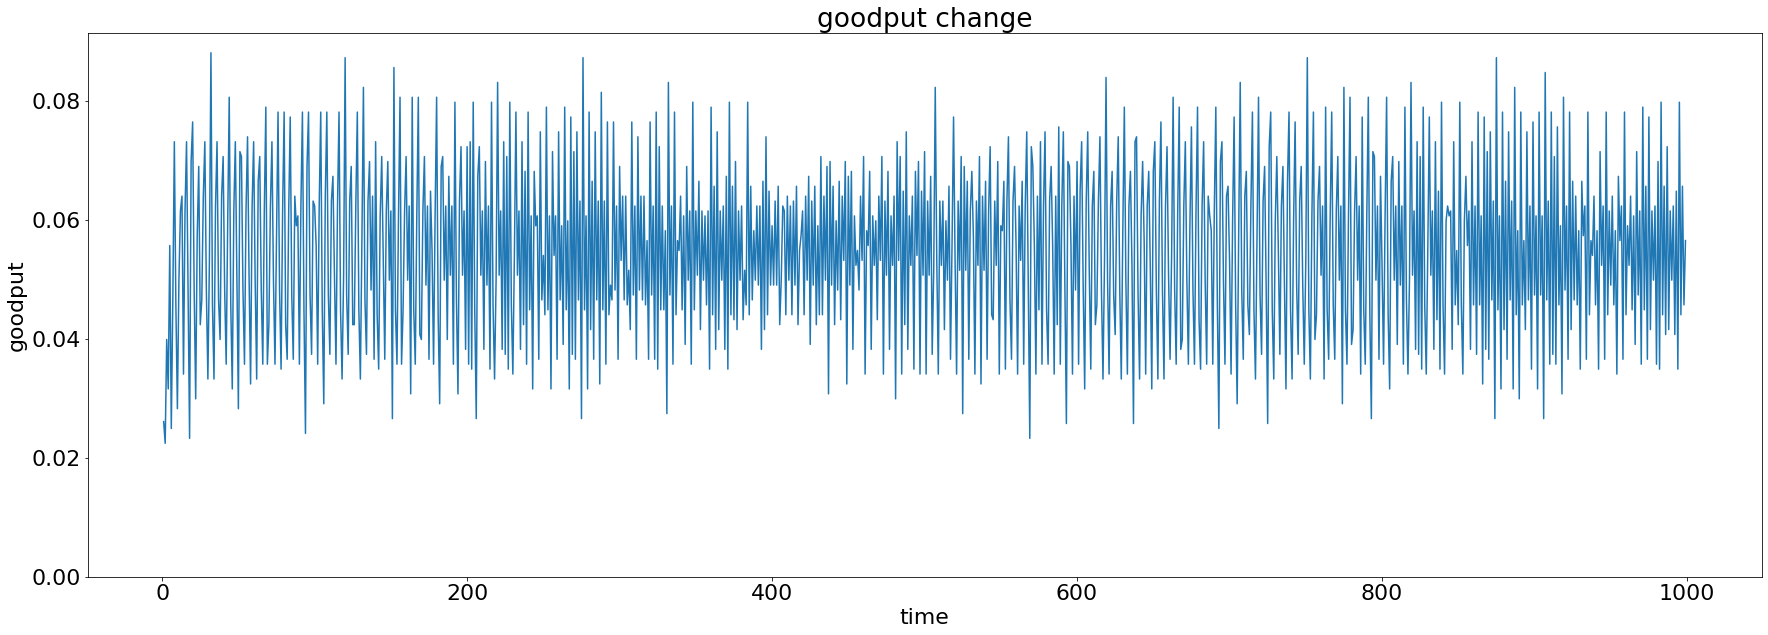

In [13]:
chart_goodput("Newreno/goodput/flow1", "Newreno_goodput_flow1")

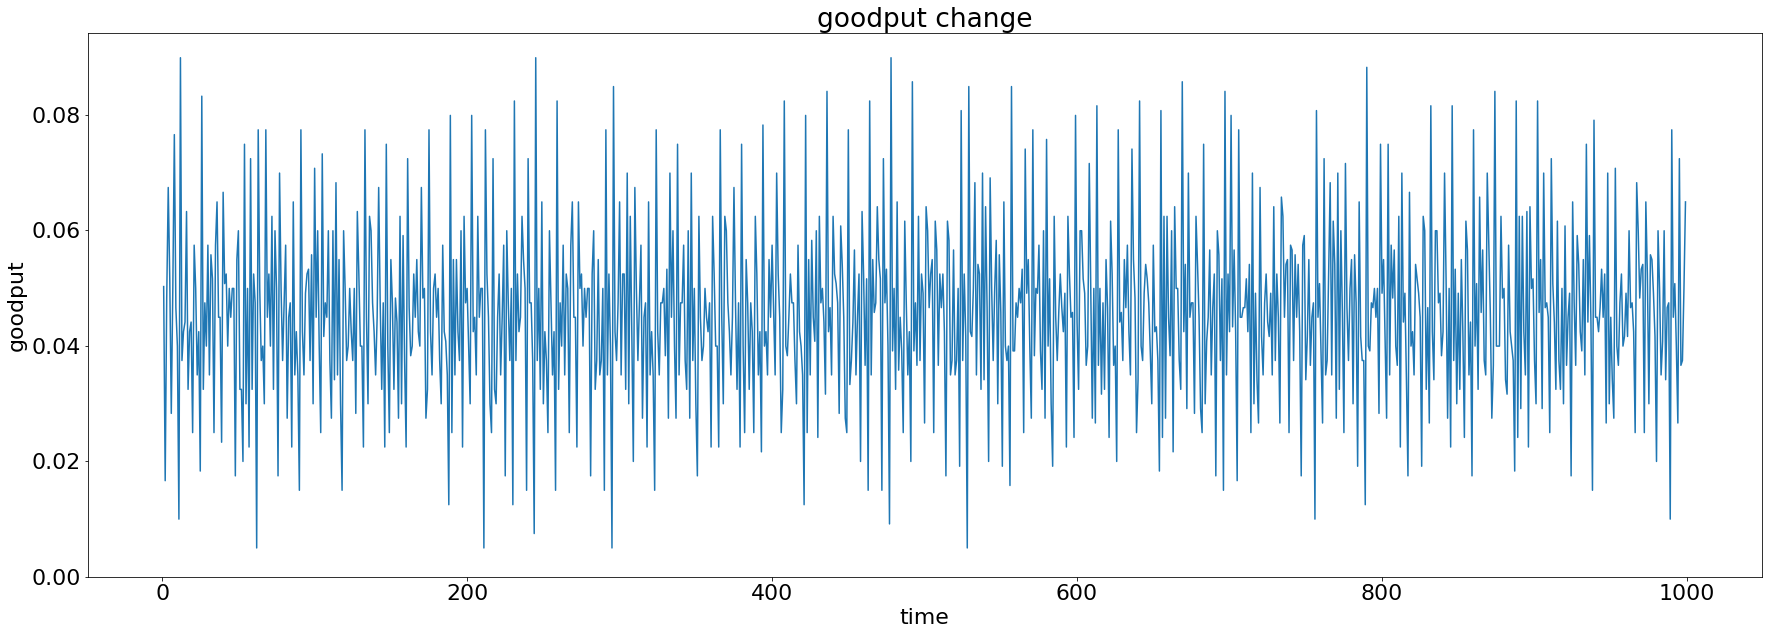

In [14]:
chart_goodput("Tahoe/goodput/flow0", "Tahoe_goodput_flow0")

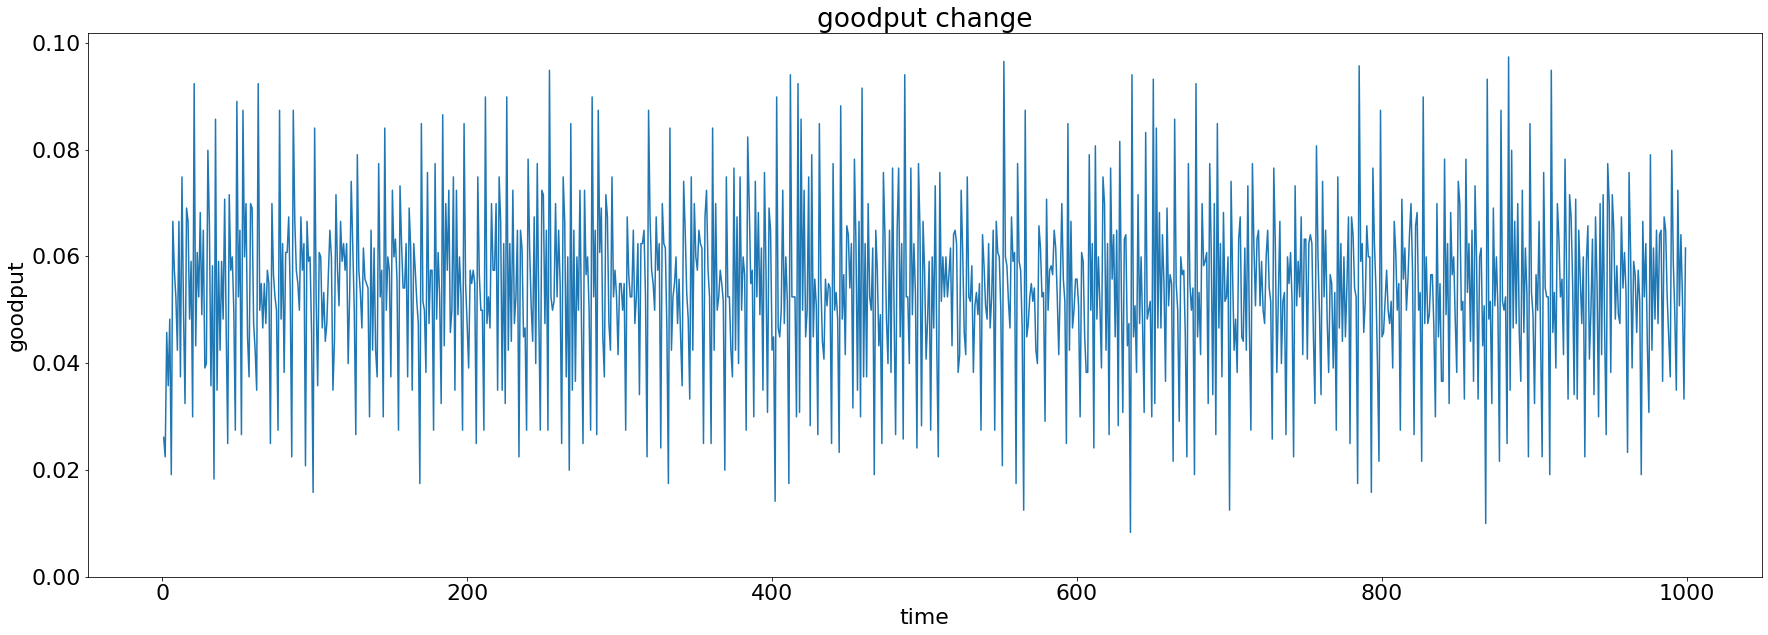

In [15]:
chart_goodput("Tahoe/goodput/flow1", "Tahoe_goodput_flow1")

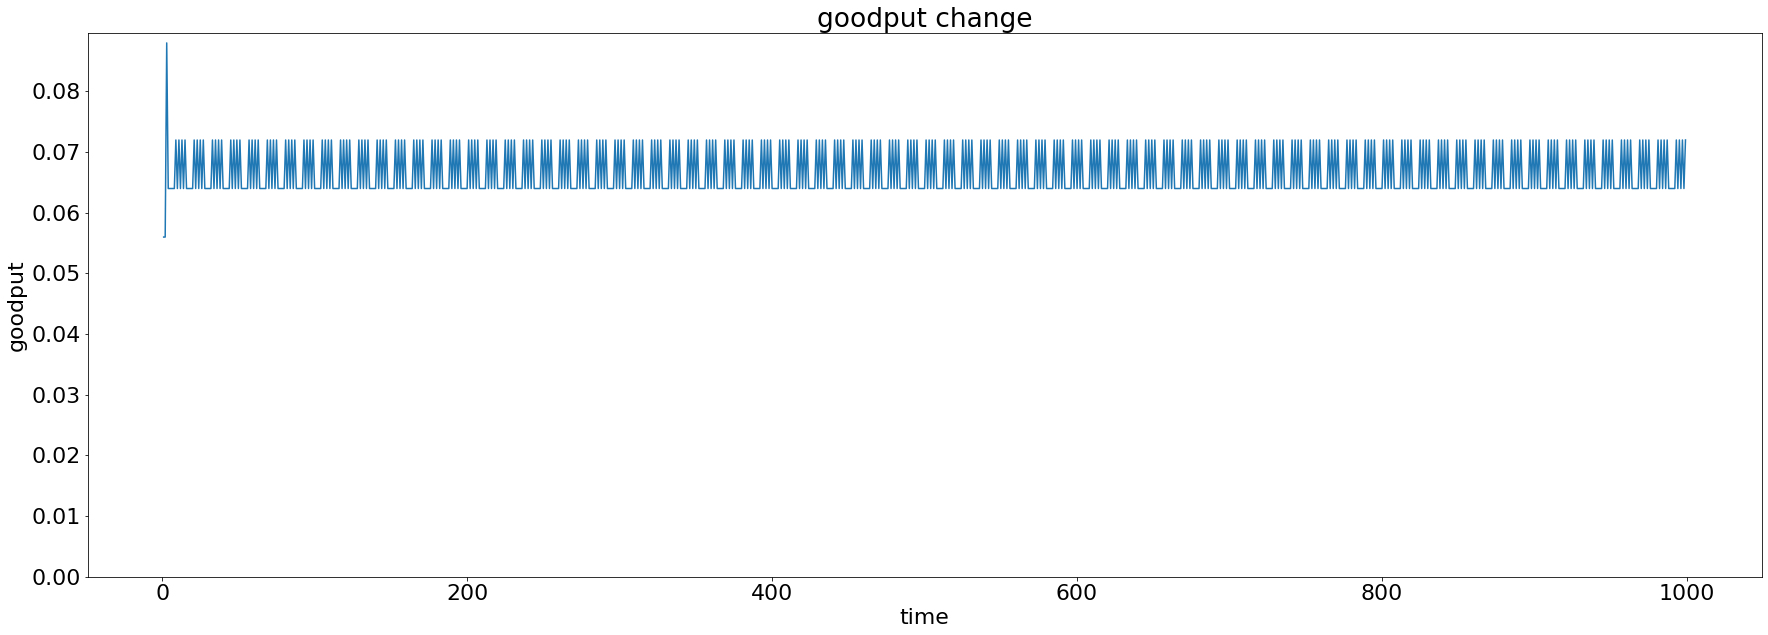

In [16]:
chart_goodput("Vegas/goodput/flow0", "Vegas_goodput_flow0")

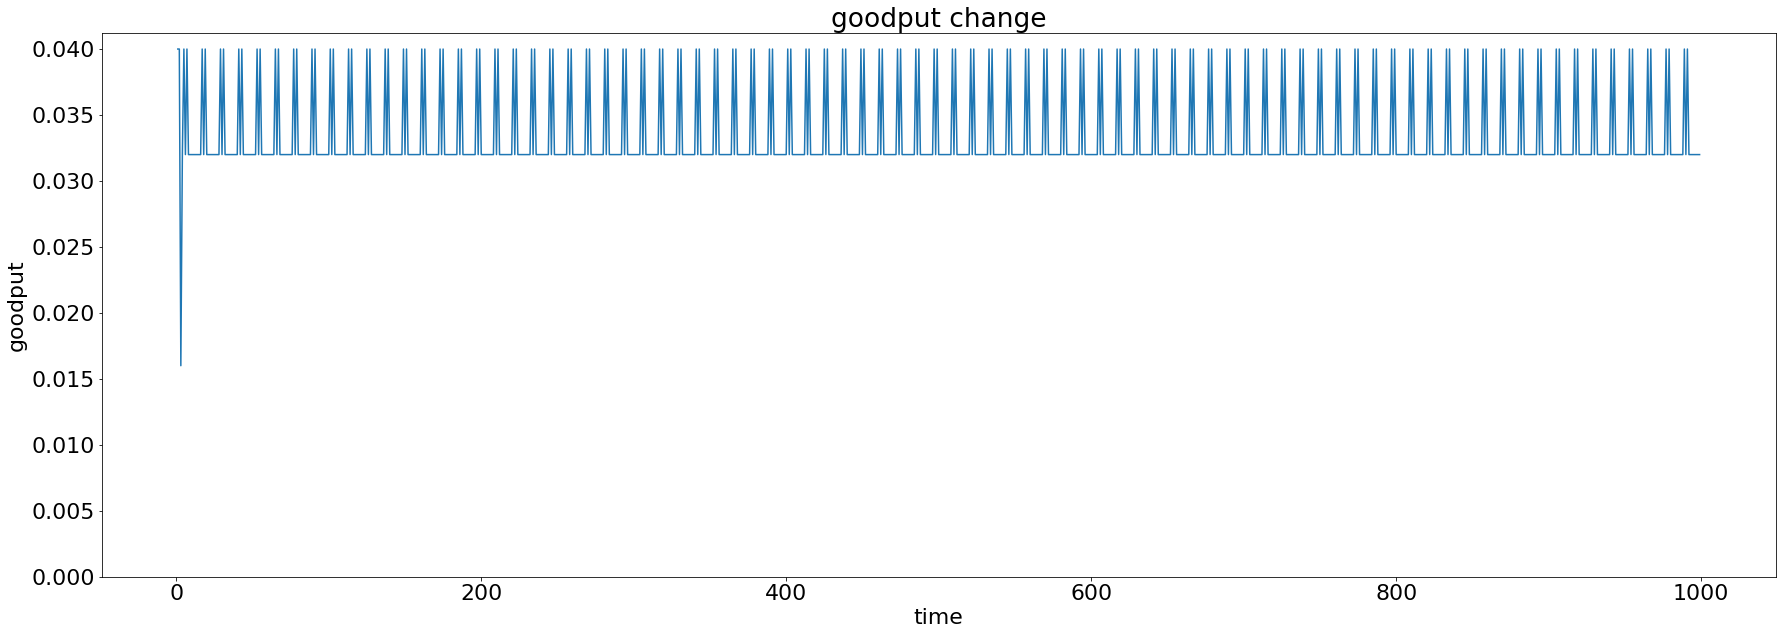

In [17]:
chart_goodput("Vegas/goodput/flow1", "Vegas_goodput_flow1")

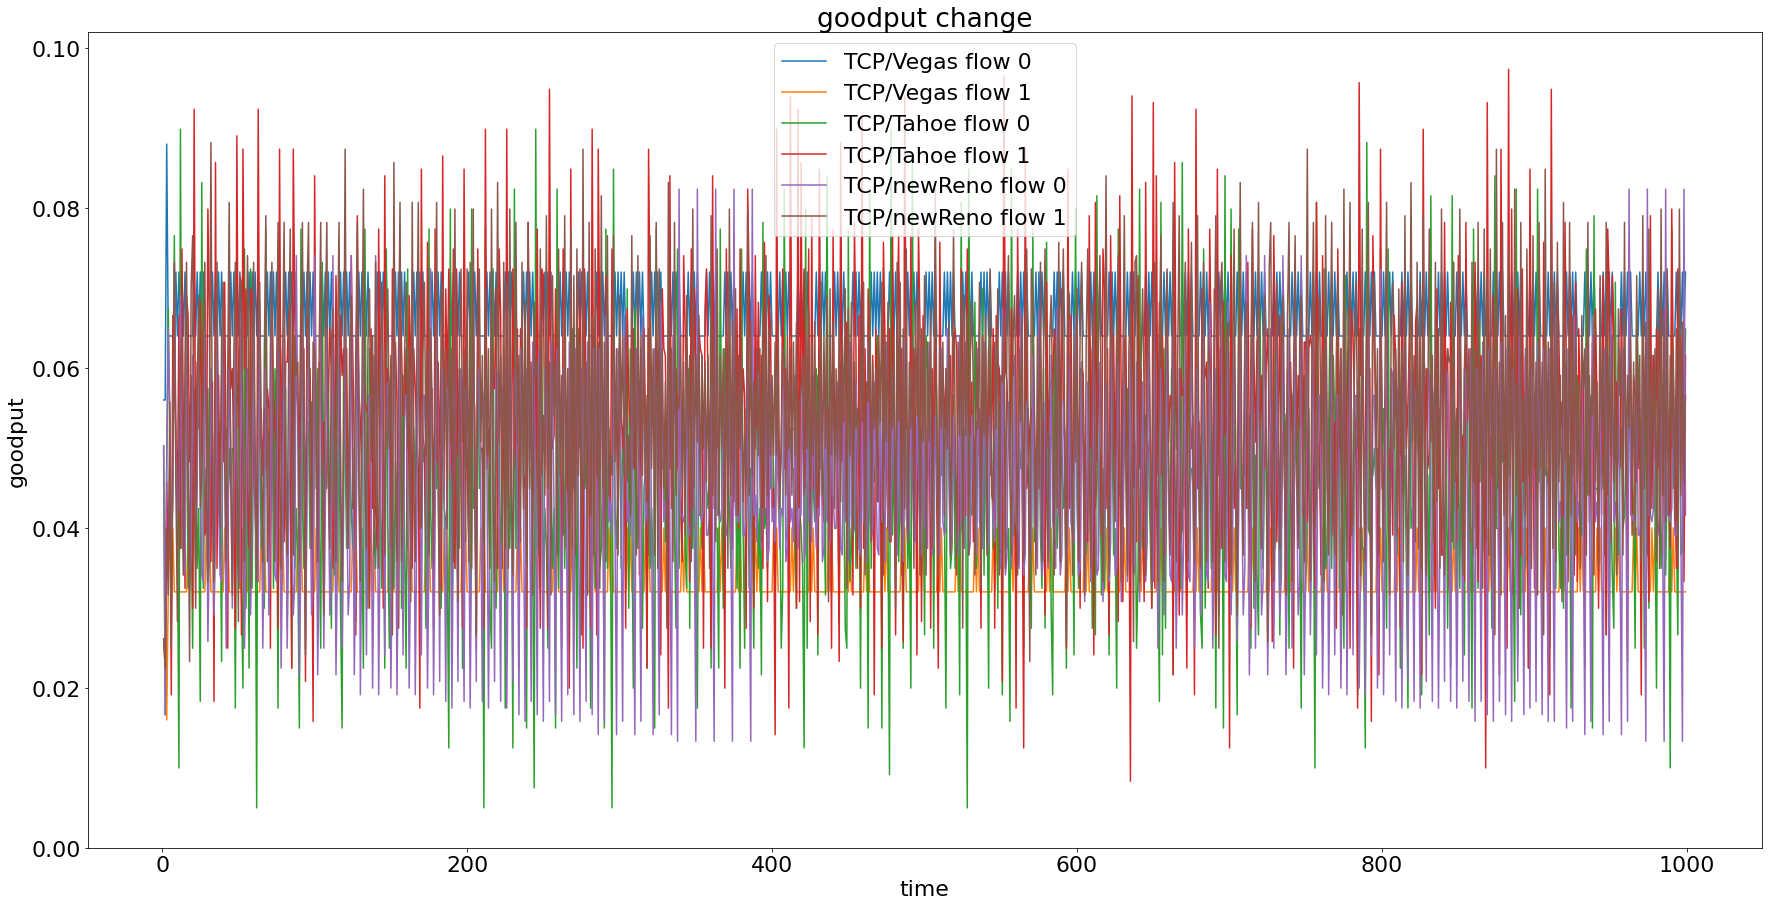

In [18]:
filepath1 = "Vegas/goodput/flow0/mean.txt"
filepath2 = "Vegas/goodput/flow1/mean.txt"
filepath3 = "Tahoe/goodput/flow0/mean.txt"
filepath4 = "Tahoe/goodput/flow1/mean.txt"
filepath5 = "Newreno/goodput/flow0/mean.txt"
filepath6 = "Newreno/goodput/flow1/mean.txt"
times1 = []
values1 = []
times2 = []
values2 = []
times3 = []
values3 = []
times4 = []
values4 = []
times5 = []
values5 = []
times6 = []
values6 = []

f = open(filepath1, "r")
for line in f.readlines():
    info = line.strip().split(" ")
    time, value = int(info[0]), float(info[1])
    times1.append(time)
    values1.append(value)

f = open(filepath2, "r")
for line in f.readlines():
    info = line.strip().split(" ")
    time, value = int(info[0]), float(info[1])
    times2.append(time)
    values2.append(value)

    
f = open(filepath3, "r")
for line in f.readlines():
    info = line.strip().split(" ")
    time, value = int(info[0]), float(info[1])
    times3.append(time)
    values3.append(value)


f = open(filepath4, "r")
for line in f.readlines():
    info = line.strip().split(" ")
    time, value = int(info[0]), float(info[1])
    times4.append(time)
    values4.append(value)


f = open(filepath5, "r")
for line in f.readlines():
    info = line.strip().split(" ")
    time, value = int(info[0]), float(info[1])
    times5.append(time)
    values5.append(value)


f = open(filepath6, "r")
for line in f.readlines():
    info = line.strip().split(" ")
    time, value = int(info[0]), float(info[1])
    times6.append(time)
    values6.append(value)

plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(30,15))  
plt.title('goodput change') 
plt.xlabel('time')
plt.ylabel('goodput') 
plt.plot(times1, values1, label='TCP/Vegas flow 0')
plt.plot(times2, values2, label='TCP/Vegas flow 1')
plt.plot(times3, values3 , label='TCP/Tahoe flow 0')  
plt.plot(times4, values4 , label='TCP/Tahoe flow 1')   
plt.plot(times5, values5 , label='TCP/newReno flow 0')  
plt.plot(times5, values6 , label='TCP/newReno flow 1')
plt.ylim(ymin=0)  # this line
plt.legend()
plt.savefig('plot/goodput.png')
plt.show()

In [19]:
def chart_rtt(mypath, plotname):
    onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
    num_files = len(onlyfiles)
    data = {}
    for file in onlyfiles:
        f = open(mypath + "/" + file, "r")
        f.readline()
        for line in f.readlines():
            info = line.strip().split(" ")
            time, value = int(info[0]), float(info[1])
            if time not in data:
                data[time] = value
            else:
                data[time] += value

    f = open(mypath + "/mean.txt", "w")
    values = []
    times = []

    for time in data:
        data[time] = data[time] / num_files
        values.append(data[time])
        times.append(time)
        f.write(str(time) + " " + str(data[time]) + "\n")
    f.close()
        
    plt.rcParams.update({'font.size': 22})
    plt.figure(figsize=(30,10))    
    plt.plot(times, values)
    plt.ylim(ymin=0)  # this line
    plt.xlabel('time')
    plt.ylabel('rtt') 
    plt.title('rtt change')
    plt.savefig("plot/" + plotname + ".png")
    plt.show()

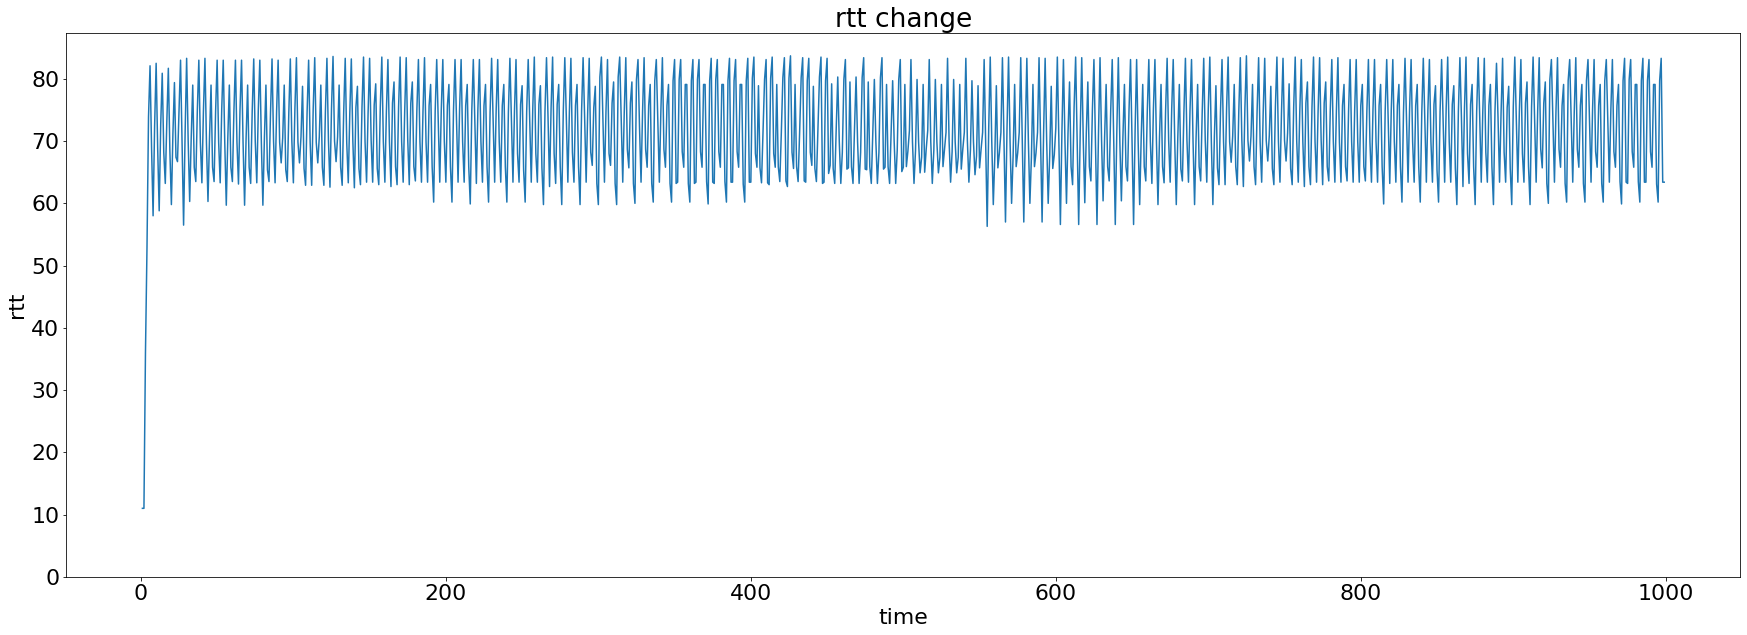

In [20]:
chart_rtt("Newreno/rtt/flow0", "Newreno_rtt_flow0")

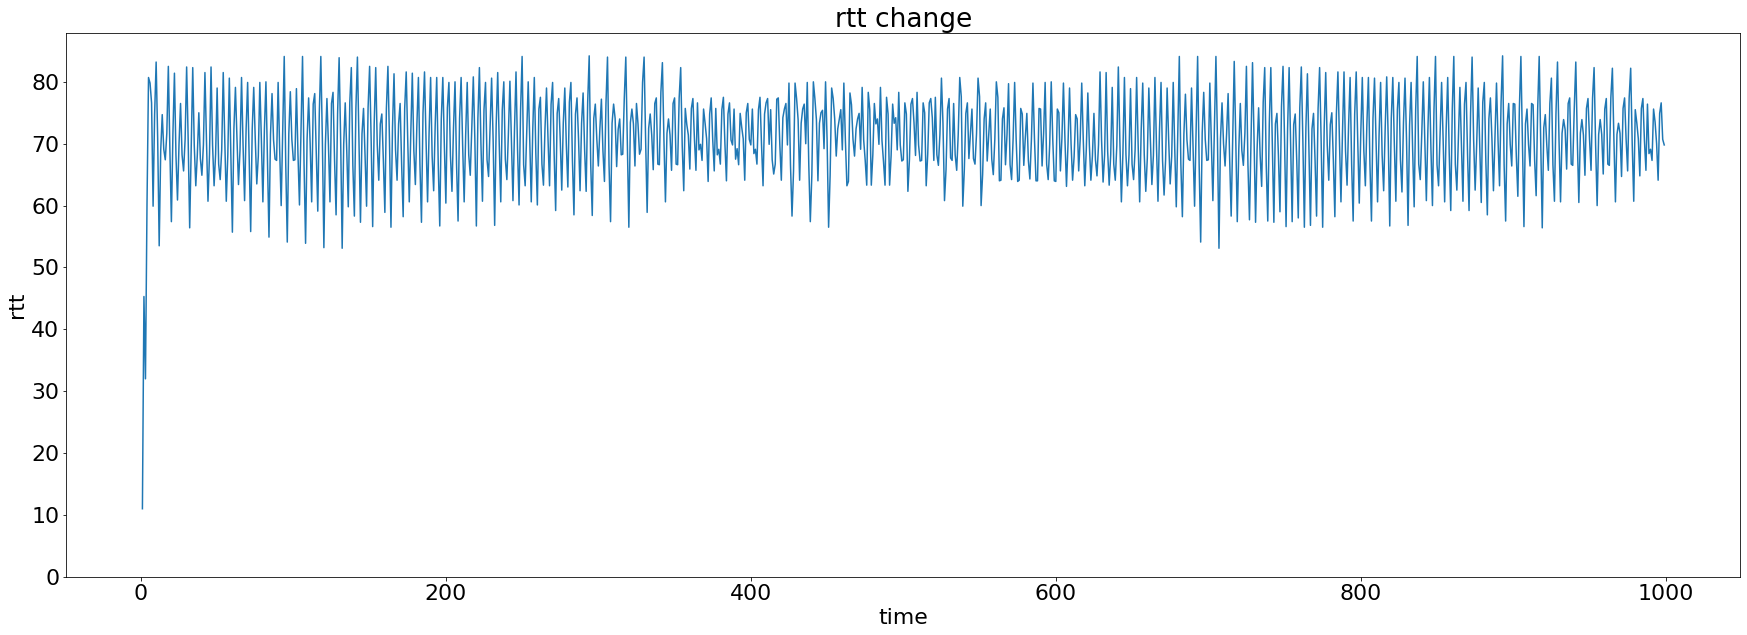

In [21]:
chart_rtt("Newreno/rtt/flow1", "Newreno_rtt_flow1")

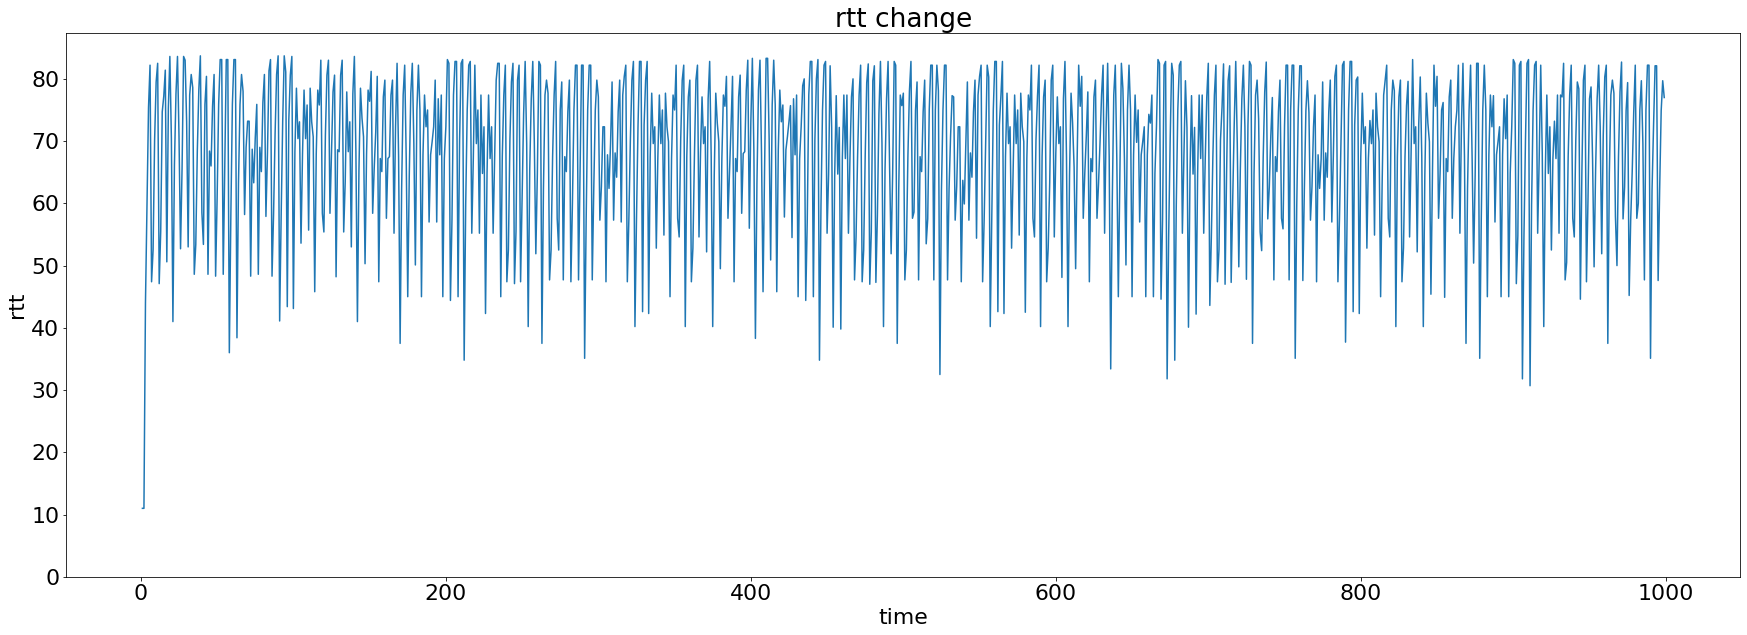

In [22]:
chart_rtt("Tahoe/rtt/flow0", "Tahoe_rtt_flow0")

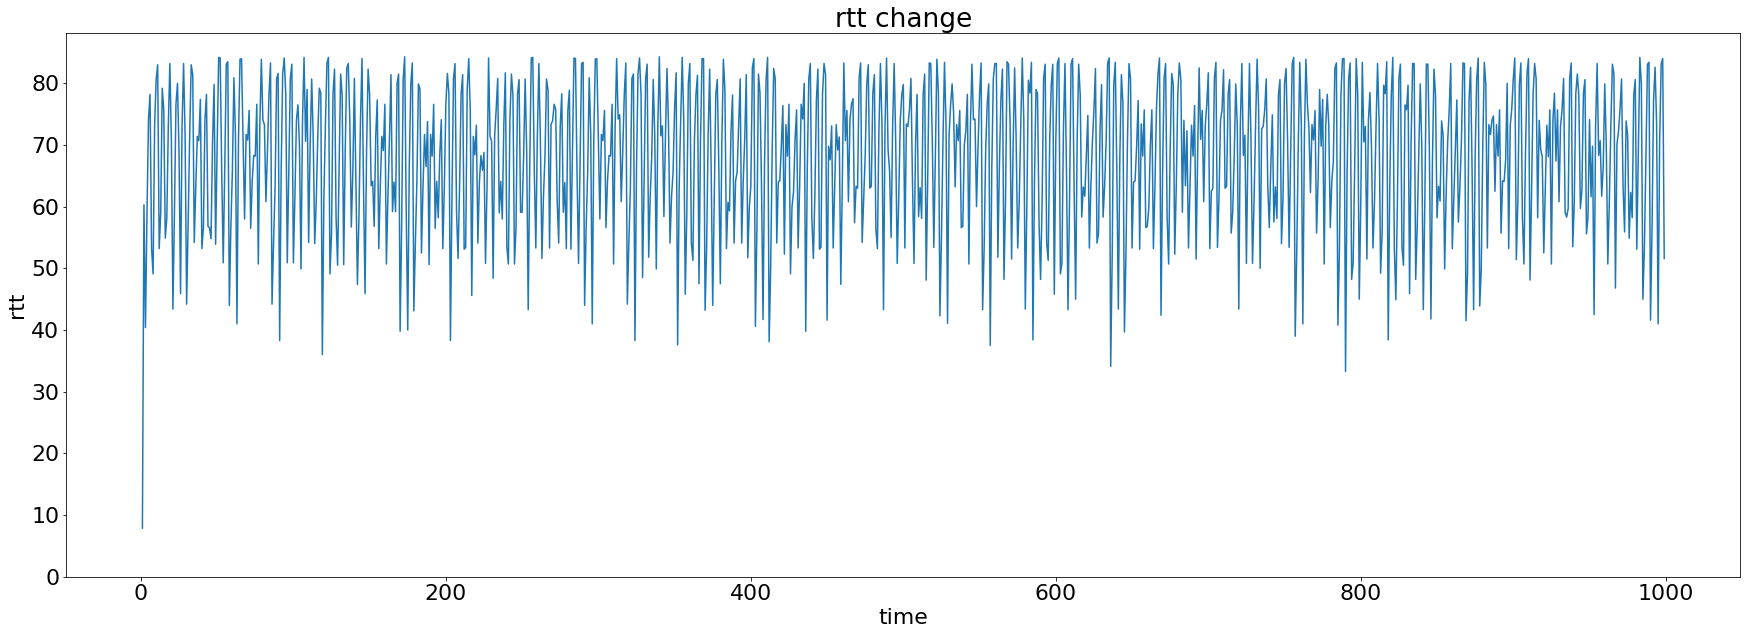

In [23]:
chart_rtt("Tahoe/rtt/flow1", "Tahoe_rtt_flow1")

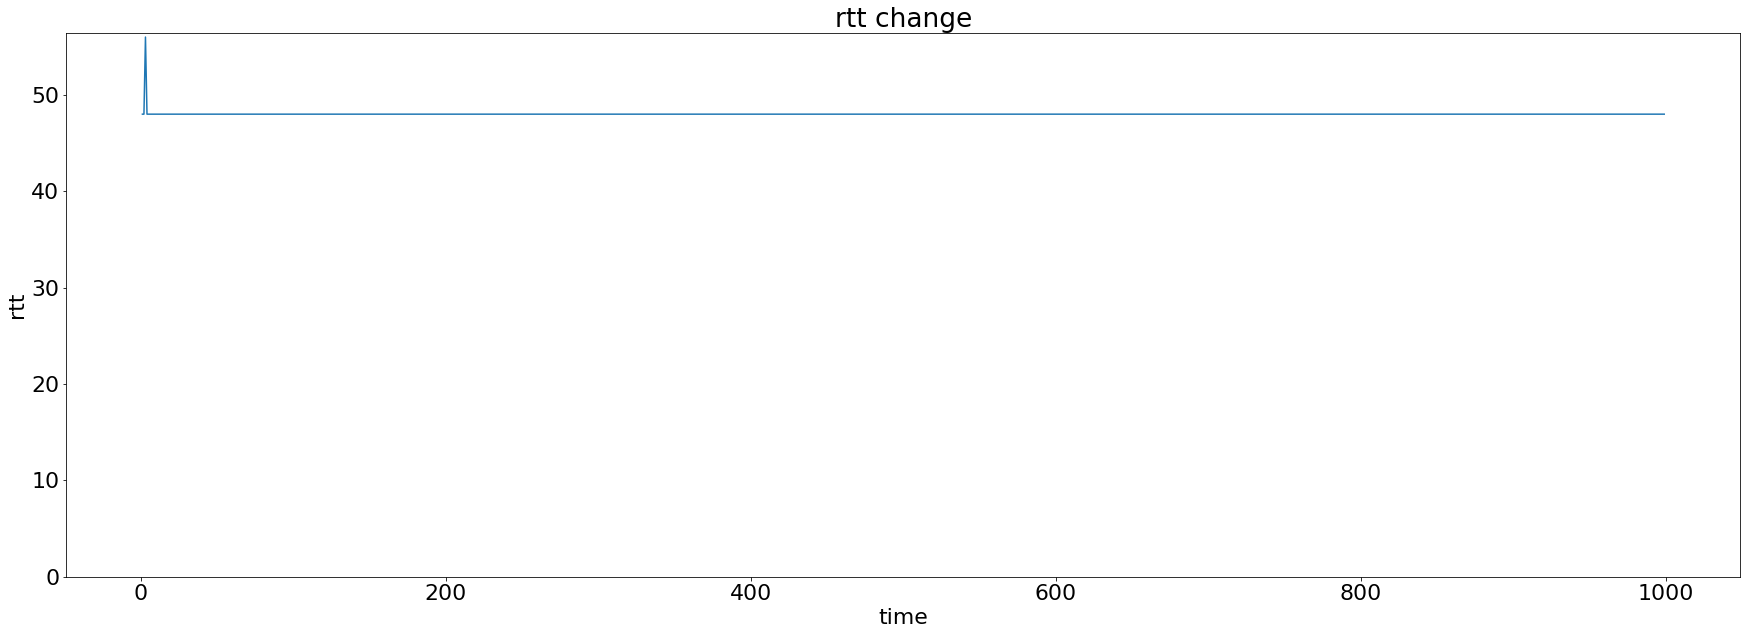

In [24]:
chart_rtt("Vegas/rtt/flow0", "Vegas_rtt_flow0")

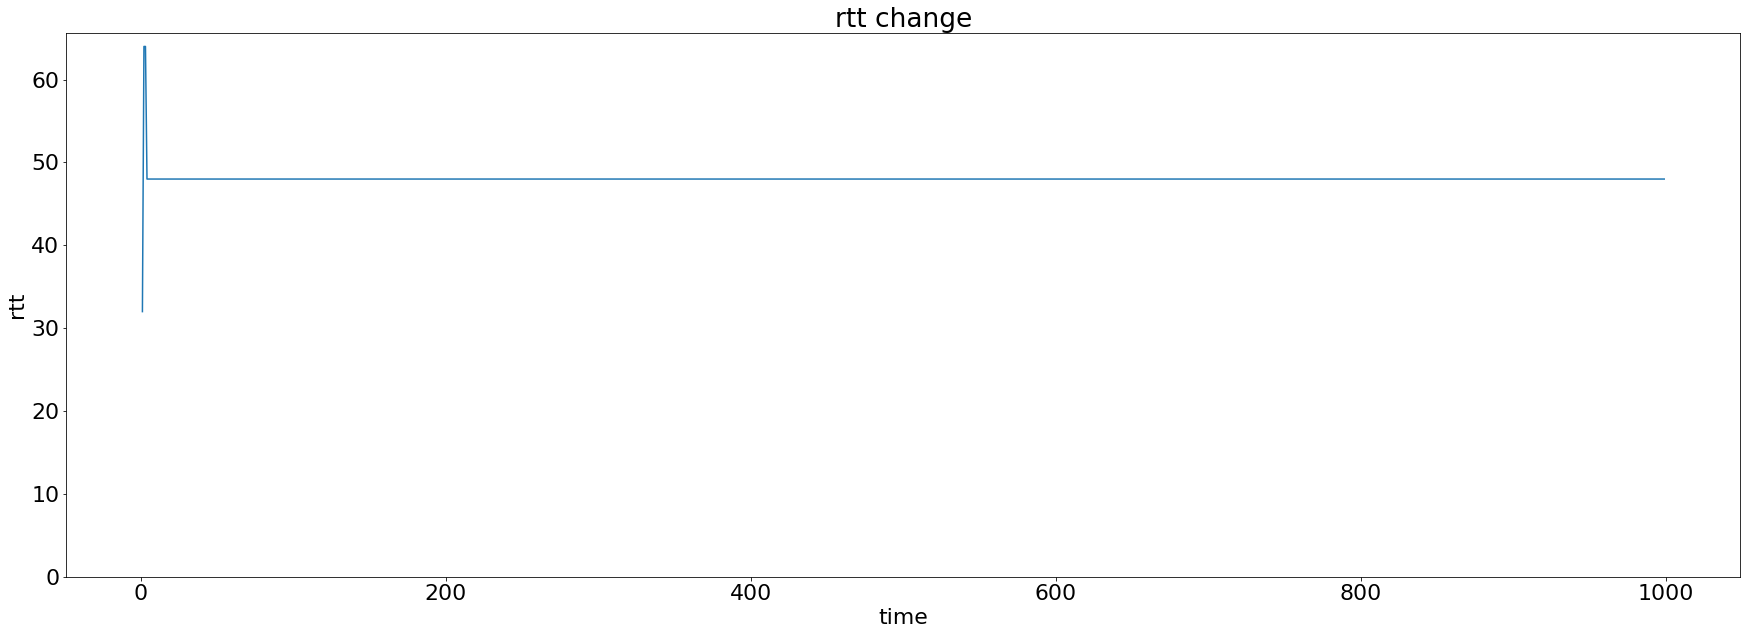

In [25]:
chart_rtt("Vegas/rtt/flow1", "Vegas_rtt_flow1")

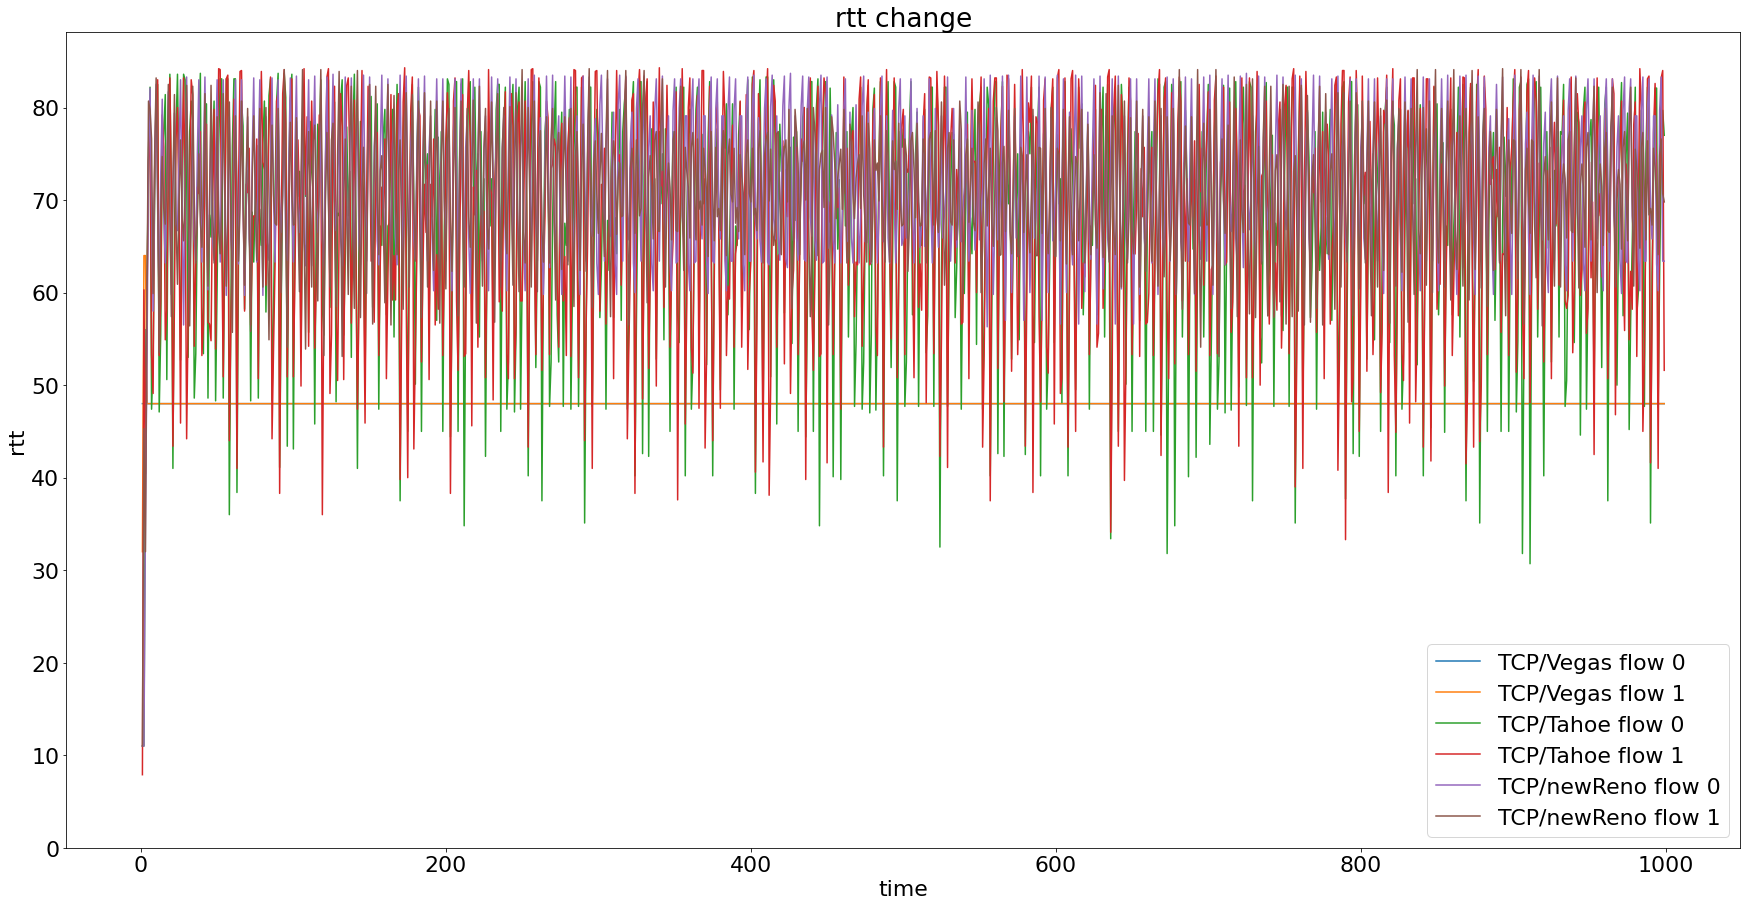

In [26]:
filepath1 = "Vegas/rtt/flow0/mean.txt"
filepath2 = "Vegas/rtt/flow1/mean.txt"
filepath3 = "Tahoe/rtt/flow0/mean.txt"
filepath4 = "Tahoe/rtt/flow1/mean.txt"
filepath5 = "Newreno/rtt/flow0/mean.txt"
filepath6 = "Newreno/rtt/flow1/mean.txt"
times1 = []
values1 = []
times2 = []
values2 = []
times3 = []
values3 = []
times4 = []
values4 = []
times5 = []
values5 = []
times6 = []
values6 = []

f = open(filepath1, "r")
for line in f.readlines():
    info = line.strip().split(" ")
    time, value = int(info[0]), float(info[1])
    times1.append(time)
    values1.append(value)

f = open(filepath2, "r")
for line in f.readlines():
    info = line.strip().split(" ")
    time, value = int(info[0]), float(info[1])
    times2.append(time)
    values2.append(value)

    
f = open(filepath3, "r")
for line in f.readlines():
    info = line.strip().split(" ")
    time, value = int(info[0]), float(info[1])
    times3.append(time)
    values3.append(value)


f = open(filepath4, "r")
for line in f.readlines():
    info = line.strip().split(" ")
    time, value = int(info[0]), float(info[1])
    times4.append(time)
    values4.append(value)


f = open(filepath5, "r")
for line in f.readlines():
    info = line.strip().split(" ")
    time, value = int(info[0]), float(info[1])
    times5.append(time)
    values5.append(value)


f = open(filepath6, "r")
for line in f.readlines():
    info = line.strip().split(" ")
    time, value = int(info[0]), float(info[1])
    times6.append(time)
    values6.append(value)

plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(30,15))  
plt.title('rtt change') 
plt.xlabel('time')
plt.ylabel('rtt') 
plt.plot(times1, values1, label='TCP/Vegas flow 0')
plt.plot(times2, values2, label='TCP/Vegas flow 1')
plt.plot(times3, values3 , label='TCP/Tahoe flow 0')  
plt.plot(times4, values4 , label='TCP/Tahoe flow 1')   
plt.plot(times5, values5 , label='TCP/newReno flow 0')  
plt.plot(times5, values6 , label='TCP/newReno flow 1')
plt.ylim(ymin=0)  # this line
plt.legend()
plt.savefig('plot/rtt.png')
plt.show()

In [27]:
def getDropRate(tracepath):
    onlyfiles = [f for f in listdir(tracepath) if isfile(join(tracepath, f))]
    num_files = len(onlyfiles)  
    for file in onlyfiles:
        drop0 = {}
        drop1 = {}
        count = 0
        for time in range(1001):
            drop0[time] = 0
            drop1[time] = 0
        with open (tracepath + "/" + file) as f:
            for line in f:
                sec = line.split()
                event = sec[0]
                time = float(sec[1])
                from_node = sec[2]
                to_node = sec[3]
                pkttype = sec[4]
                pktsize = int(sec[5])
                flow_id = sec[7]
                src_addr = sec[8]
                dst_addr = sec[9]
                seq_num = sec[10]
                if event == 'd' and flow_id == '0':
                    count+=1
                    drop0[int(float(time))]+=1
                elif event == 'd' and flow_id == '1':
                    count+=1
                    drop1[int(float(time))]+=1
    
        
        print(file,count)
                
        out0 = open(os.path.dirname(tracepath) + "/flow0/" + Path(file).stem + ".txt", "w") 
        out1 = open(os.path.dirname(tracepath) + "/flow1/" + Path(file).stem + ".txt", "w")
        for time in range(1001):
            out0.write(str(time) + " " + str(drop0[time]) + "\n")
            out1.write(str(time) + " " + str(drop1[time]) + "\n")
        out0.close()
        out1.close()

In [28]:
getDropRate("Newreno/droprate/tracefiles")

1.tr 503
10.tr 502
8.tr 502
6.tr 502
3.tr 502
5.tr 502
9.tr 502
7.tr 503
4.tr 258
2.tr 503


In [29]:
getDropRate("Tahoe/droprate/tracefiles")

1.tr 430
10.tr 423
8.tr 430
6.tr 430
3.tr 625
5.tr 423
9.tr 430
7.tr 430
4.tr 423
2.tr 430


In [30]:
getDropRate("Vegas/droprate/tracefiles")

1.tr 0
10.tr 0
8.tr 0
6.tr 0
3.tr 0
5.tr 0
9.tr 0
7.tr 0
4.tr 0
2.tr 0


In [31]:
def chart_droprate(mypath, plotname):
    onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
    num_files = len(onlyfiles)
    data = {}
    for file in onlyfiles:
        f = open(mypath + "/" + file, "r")
        f.readline()
        for line in f.readlines():
            info = line.strip().split(" ")
            time, value = int(info[0]), float(info[1])
            if time not in data:
                data[time] = value
            else:
                data[time] += value

    f = open(mypath + "/mean.txt", "w")
    values = []
    times = []

    for time in data:
        data[time] = float(data[time] / num_files)
        values.append(data[time])
        times.append(time)
        f.write(str(time) + " " + str(data[time]) + "\n")
    f.close()
        
    plt.rcParams.update({'font.size': 22})
    plt.figure(figsize=(30,10))    
    plt.plot(times, values)
    plt.xlabel('time')
    plt.ylabel('loss') 
    plt.title('loss change')
    plt.savefig("plot/" + plotname + ".png")
    plt.show()

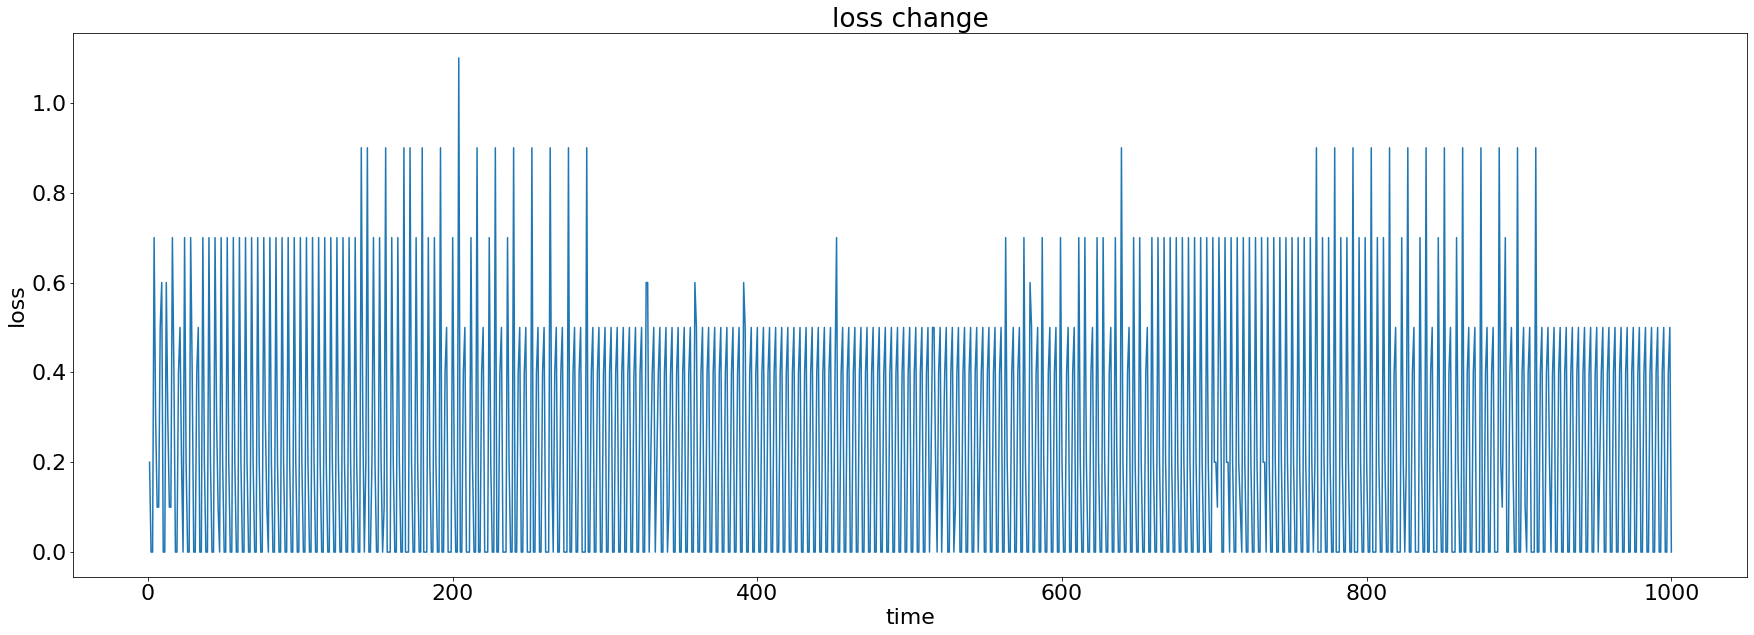

In [32]:
chart_droprate("Newreno/droprate/flow0", "Newreno_droprate_flow0")

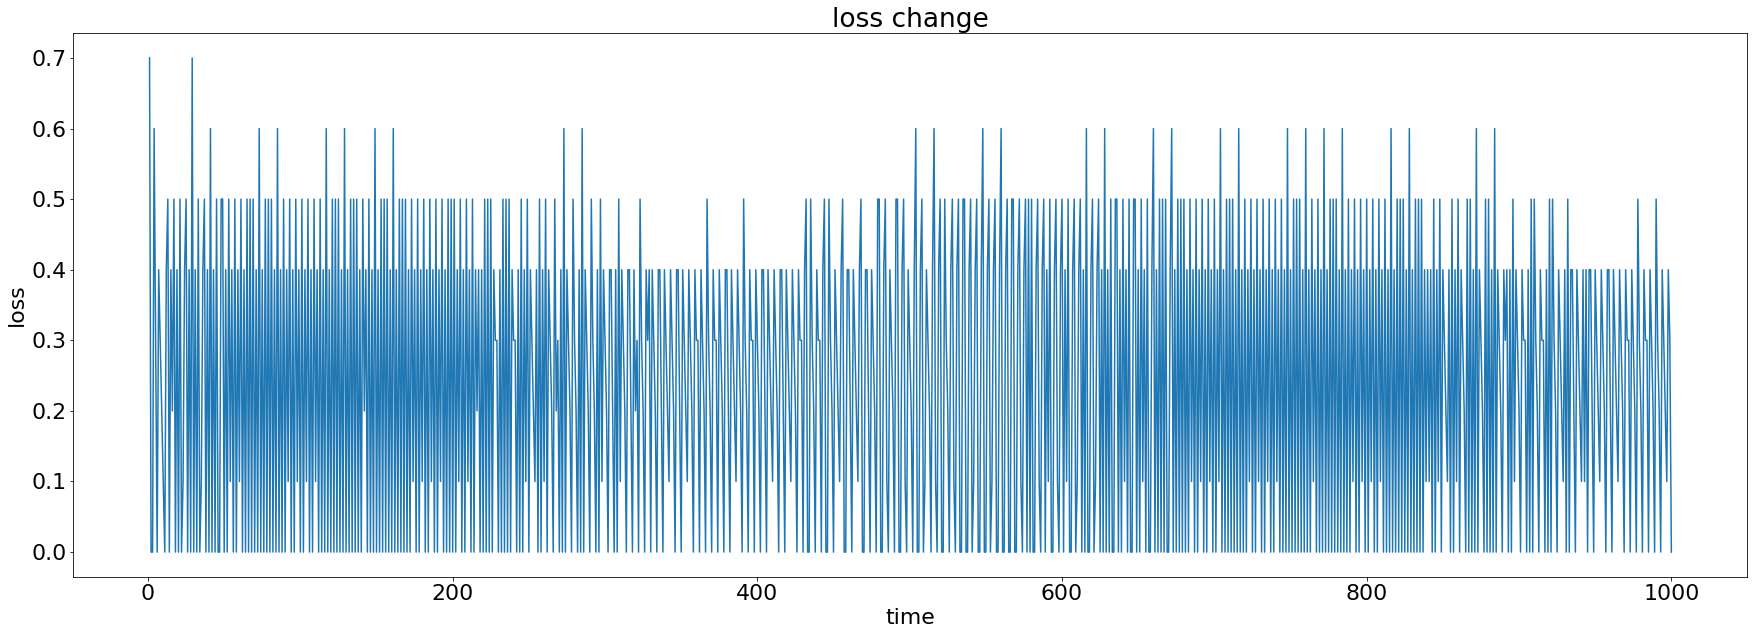

In [33]:
chart_droprate("Newreno/droprate/flow1", "Newreno_droprate_flow1")

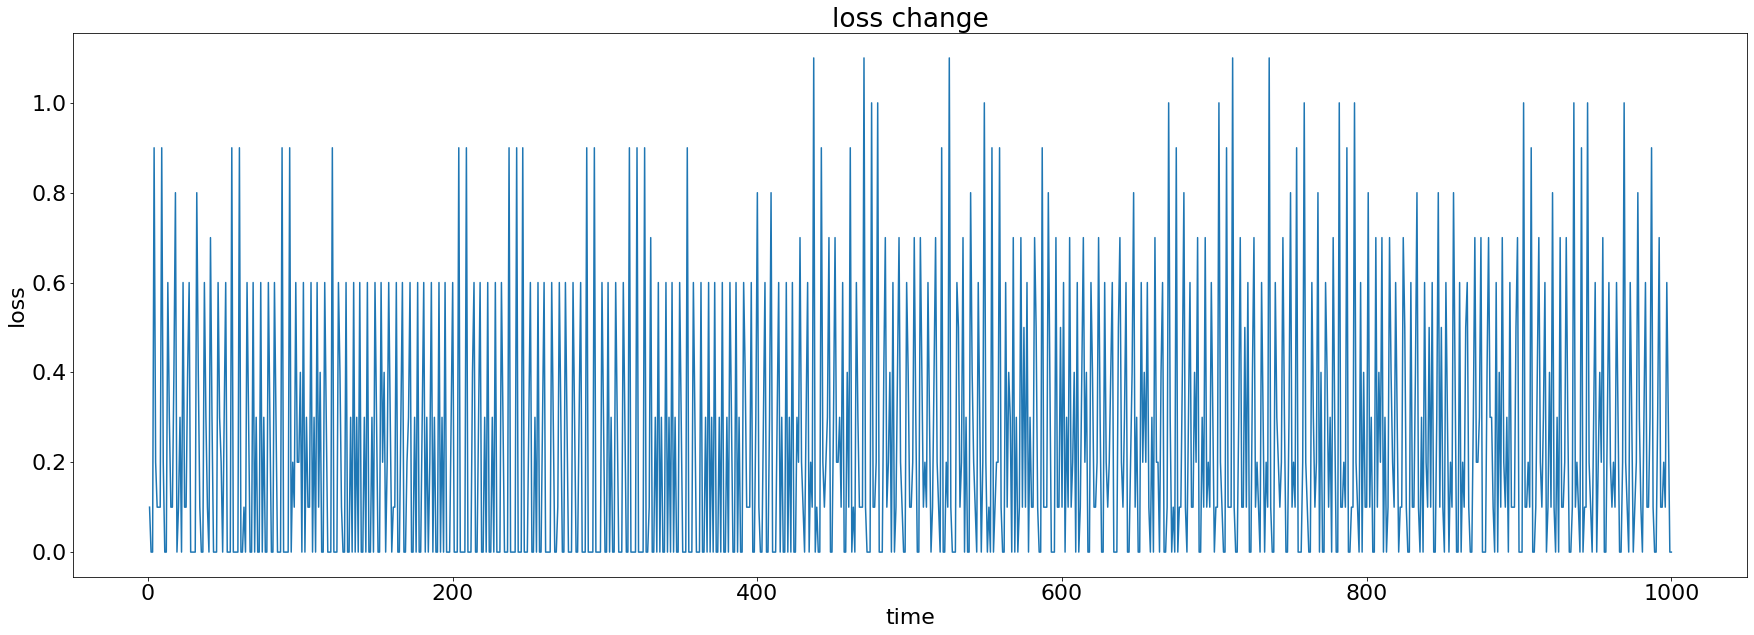

In [34]:
chart_droprate("Tahoe/droprate/flow0", "Tahoe_droprate_flow0")

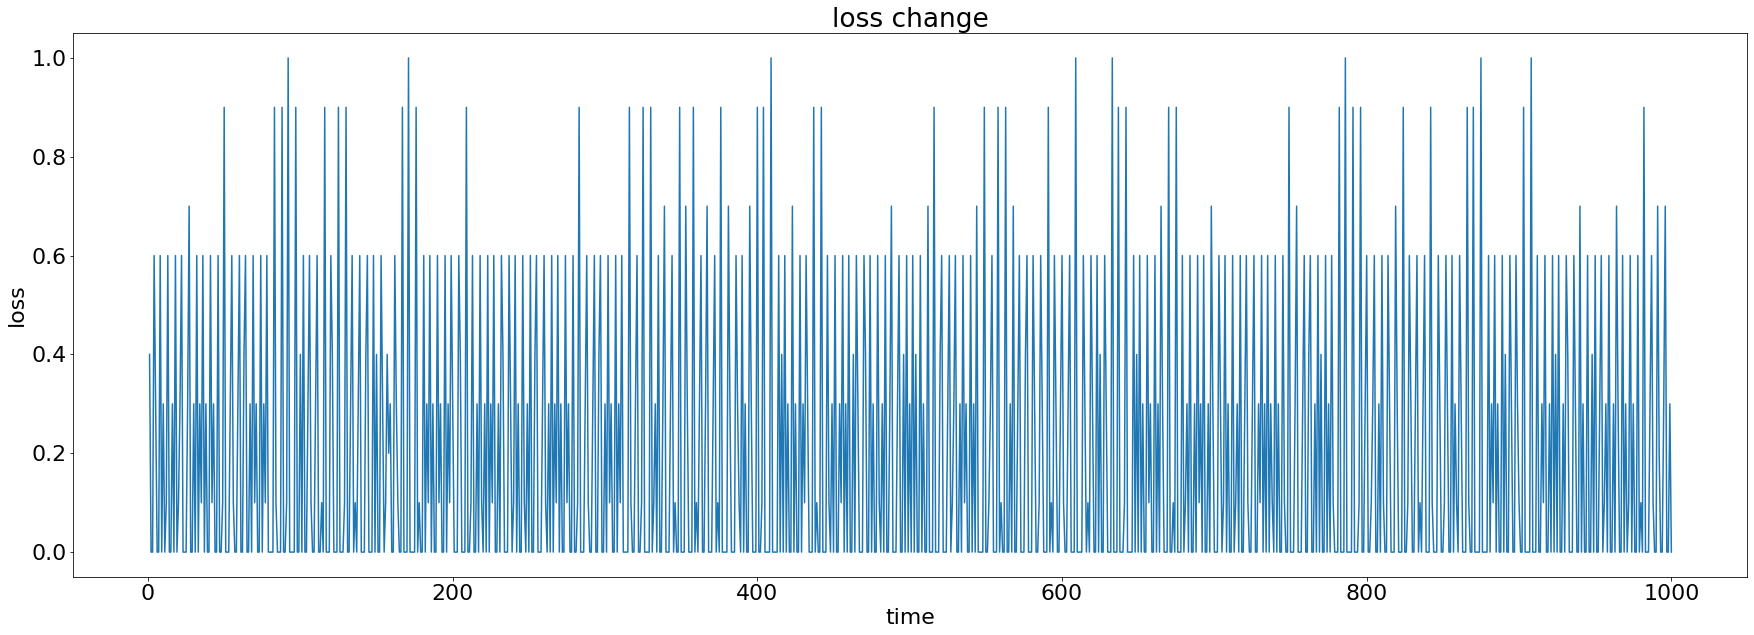

In [35]:
chart_droprate("Tahoe/droprate/flow1", "Tahoe_droprate_flow1")

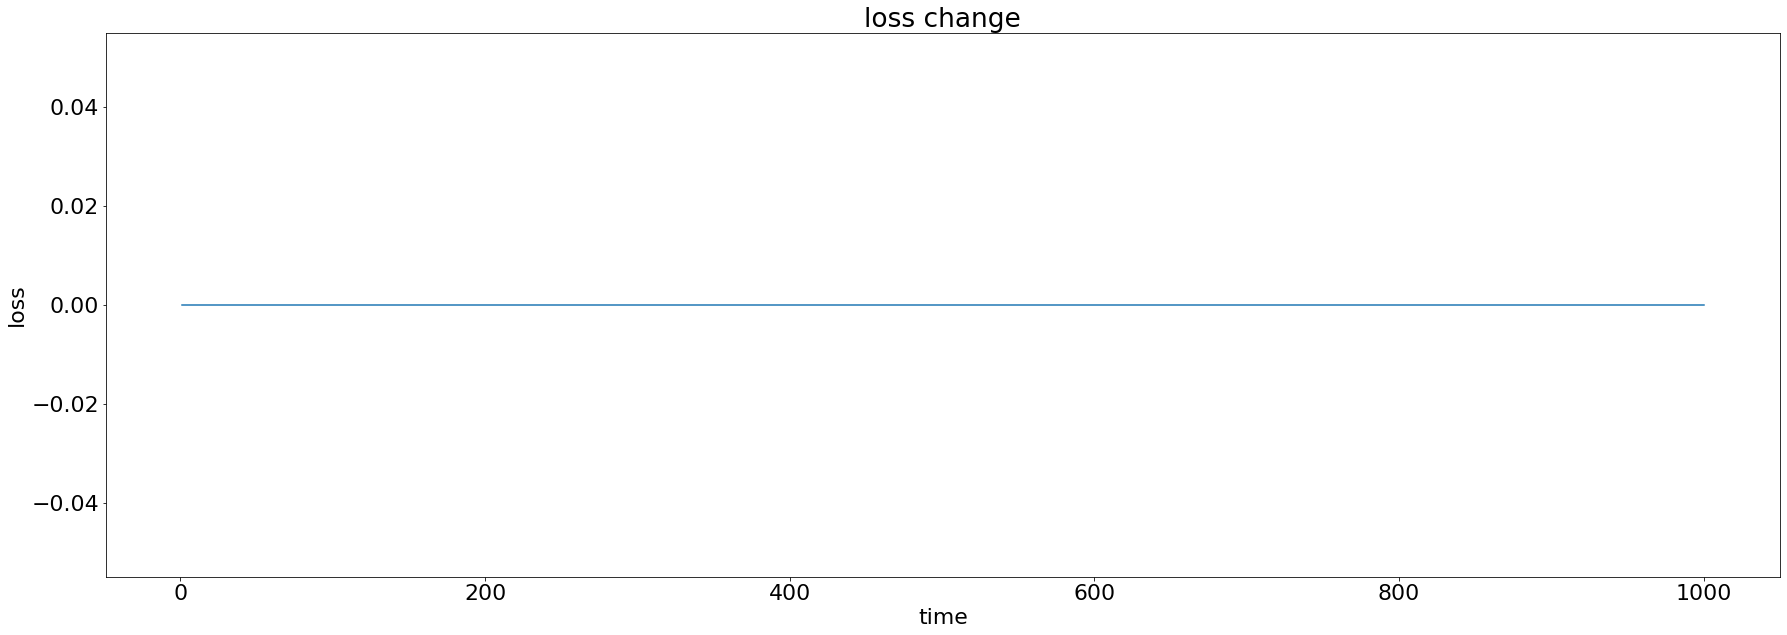

In [36]:
chart_droprate("Vegas/droprate/flow0", "Vegas_droprate_flow0")

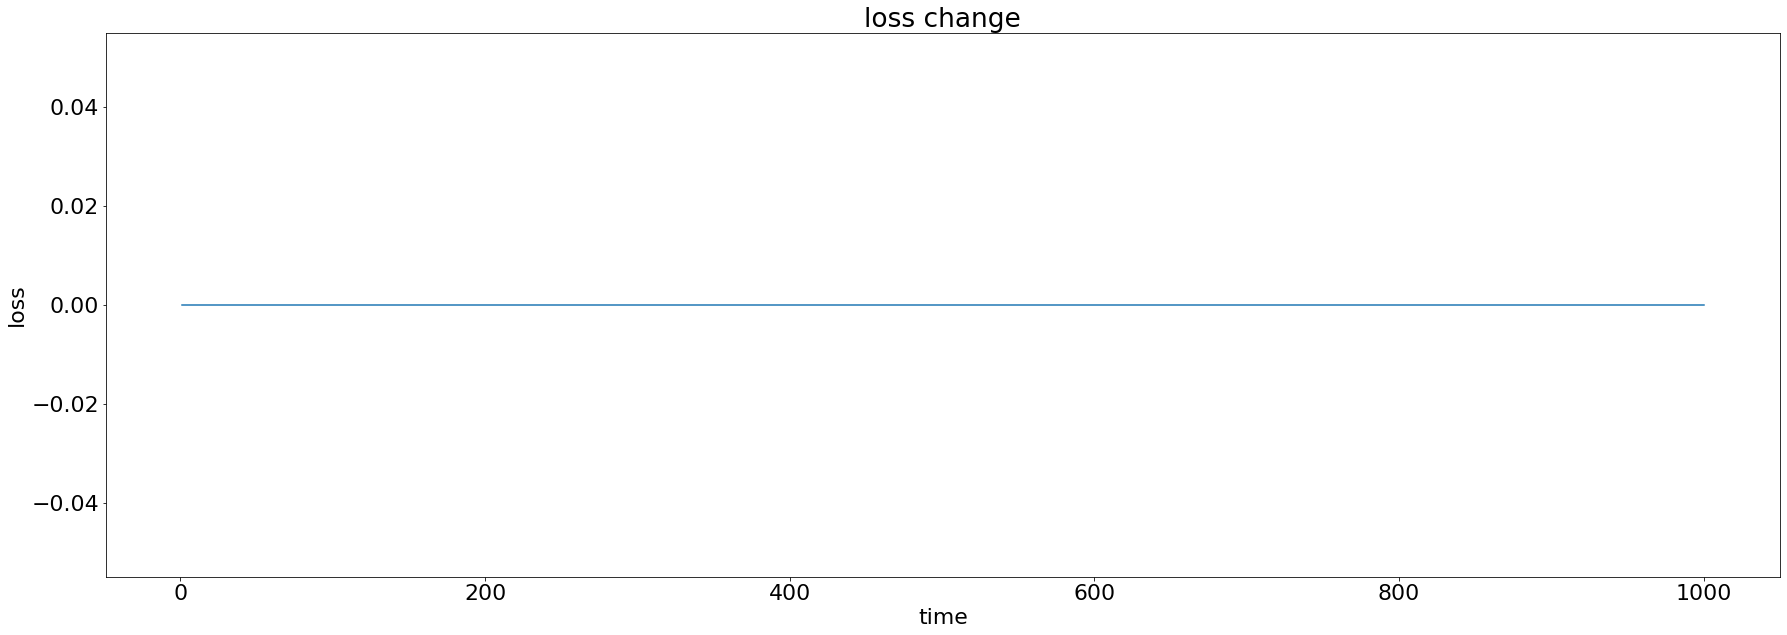

In [37]:
chart_droprate("Vegas/droprate/flow1", "Vegas_droprate_flow1")

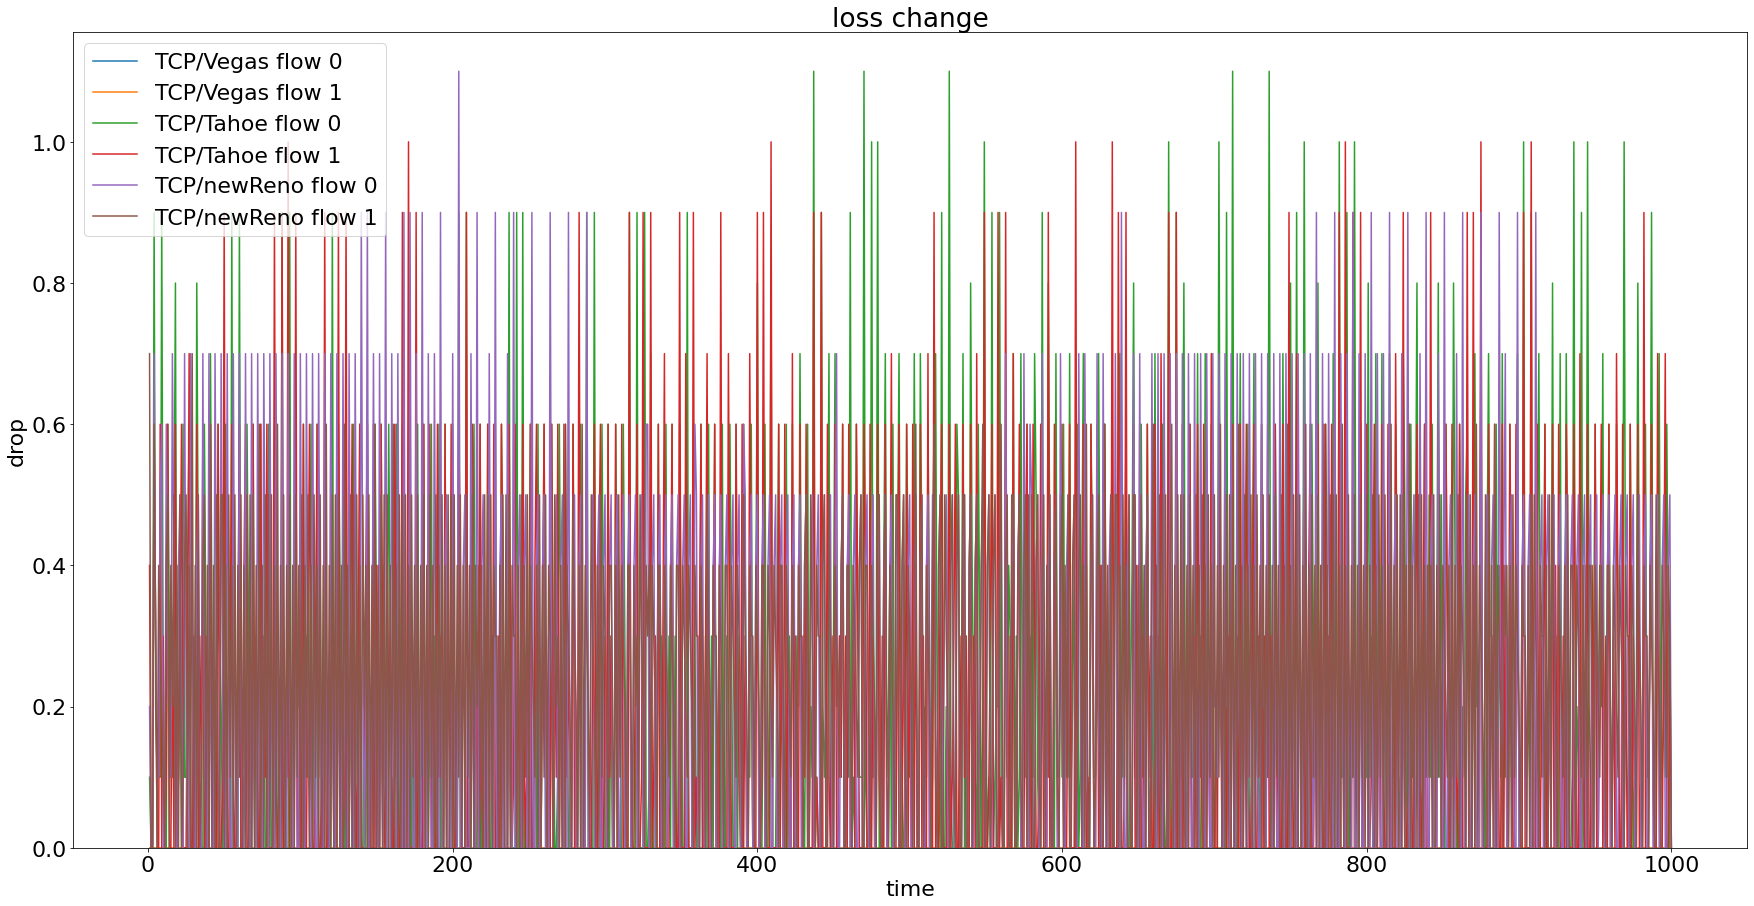

In [38]:
filepath1 = "Vegas/droprate/flow0/mean.txt"
filepath2 = "Vegas/droprate/flow1/mean.txt"
filepath3 = "Tahoe/droprate/flow0/mean.txt"
filepath4 = "Tahoe/droprate/flow1/mean.txt"
filepath5 = "Newreno/droprate/flow0/mean.txt"
filepath6 = "Newreno/droprate/flow1/mean.txt"
times1 = []
values1 = []
times2 = []
values2 = []
times3 = []
values3 = []
times4 = []
values4 = []
times5 = []
values5 = []
times6 = []
values6 = []

f = open(filepath1, "r")
for line in f.readlines():
    info = line.strip().split(" ")
    time, value = int(info[0]), float(info[1])
    times1.append(time)
    values1.append(value)

f = open(filepath2, "r")
for line in f.readlines():
    info = line.strip().split(" ")
    time, value = int(info[0]), float(info[1])
    times2.append(time)
    values2.append(value)

    
f = open(filepath3, "r")
for line in f.readlines():
    info = line.strip().split(" ")
    time, value = int(info[0]), float(info[1])
    times3.append(time)
    values3.append(value)


f = open(filepath4, "r")
for line in f.readlines():
    info = line.strip().split(" ")
    time, value = int(info[0]), float(info[1])
    times4.append(time)
    values4.append(value)


f = open(filepath5, "r")
for line in f.readlines():
    info = line.strip().split(" ")
    time, value = int(info[0]), float(info[1])
    times5.append(time)
    values5.append(value)


f = open(filepath6, "r")
for line in f.readlines():
    info = line.strip().split(" ")
    time, value = int(info[0]), float(info[1])
    times6.append(time)
    values6.append(value)

plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(30,15))  
plt.title('loss change') 
plt.xlabel('time')
plt.ylabel('drop') 
plt.plot(times1, values1, label='TCP/Vegas flow 0')
plt.plot(times2, values2, label='TCP/Vegas flow 1')
plt.plot(times3, values3 , label='TCP/Tahoe flow 0')  
plt.plot(times4, values4 , label='TCP/Tahoe flow 1')   
plt.plot(times5, values5 , label='TCP/newReno flow 0')  
plt.plot(times5, values6 , label='TCP/newReno flow 1')
plt.ylim(ymin=0)  # this line
plt.legend()
plt.savefig('plot/droprate.png')
plt.show()